# Classification
The most basic concept of Machine Learning is to enable machines to learn and understand data, perform classification and prediction, and leverage the advantage of rapid computation for making decisions in scenarios with multiple variables, large datasets, and the need for real-time responses. In real-life applications, Machine Learning is widely used in various fields such as image recognition, speech recognition, financial risk assessment, etc.

At the core of Machine Learning is the classifier, which learns from data, extracts features, and can classify new data. Three common classifiers are **Multinomial Logistic Regression**, **Support Vector Machine (SVM)**, and **Neural Network**. Multinomial Logistic Regression is a common multiclass classifier that transforms a multiclass classification problem into multiple binary classification problems and uses Maximum Likelihood Estimation (MLE) to learn model parameters. Support Vector Machine maps data to a high-dimensional space to make data linearly separable in cases where it is not separable in a low-dimensional space. Neural Network is a network structure composed of neurons and has powerful learning and adaptation capabilities, applicable to various classification problems.

This project will use these three classifiers to classify three sets of different types of data and compare and evaluate their performance. The three datasets are: 178 bottles of wine data from three different regions, containing 13 different wine components; 400 face images of 10 individuals from AT&T, each with a size of 64x64 pixels; and 2410 face images of 38 individuals from Yale Faces, each with a size of 192x168 pixels. When making comparisons, each dataset is divided into "raw data" and "principal component data." The data must be split into training and testing sets, and the three classifiers are trained and tested using the same dataset to ensure fair comparisons. Through this project, we will delve into the characteristics, advantages, and disadvantages of these three classifiers and their performance on different types of datasets, providing a deeper understanding and insight into the application and selection of Machine Learning techniques.

## Wine Data
The dataset comprising 178 red wines produced by three different wine manufacturers in a specific region of Italy, which includes 13 chemical components for each of these 178 red wines. (https://www.kaggle.com/datasets/harrywang/wine-dataset-for-clustering)

### Load Data

In [3]:
import pandas as pd
import os

DOWNLOAD_PATH = "/Users/loyichun/python/Machine Learning/datasets/"
DOWNLOAD_DATA1 = "wine.xlsx"

def load_data(download_path = DOWNLOAD_PATH, download_data = DOWNLOAD_DATA1):
    data_path = os.path.join(download_path, download_data)
    return pd.read_excel(data_path)

wine = load_data()
wine.head()  


,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


The target variable (variable to be classified) is "Customer_Segment" representing the origin of the wine.

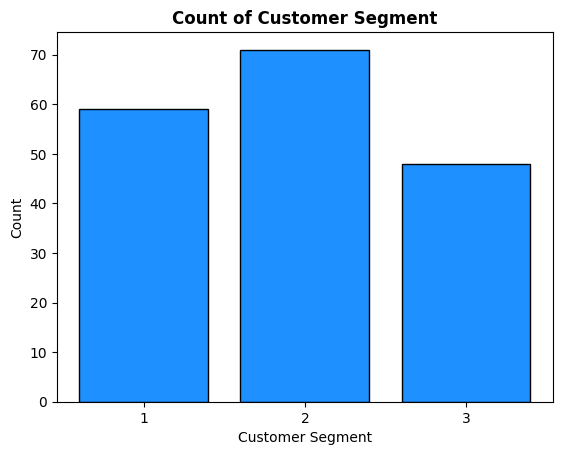

In [4]:
import matplotlib.pyplot as plt
wine_drop = wine.iloc[:, :-1]
y1 = wine.iloc[:, -1]
y1_counts = y1.value_counts()

plt.bar(y1_counts.index, y1_counts.values, color = 'dodgerblue', edgecolor = 'black')
plt.xlabel('Customer Segment')
plt.ylabel('Count')
plt.xticks([1, 2, 3])
plt.title('Count of Customer Segment', fontweight = 'bold')
plt.show()


From the graph, it can be observed that there is a higher quantity of data for Customer_Segment 2, with approximately 70 entries. On the other hand, Customer_Segment 1 and Customer_Segment 3 have relatively fewer entries, around 60 and 50, respectively.

### Standardized Data

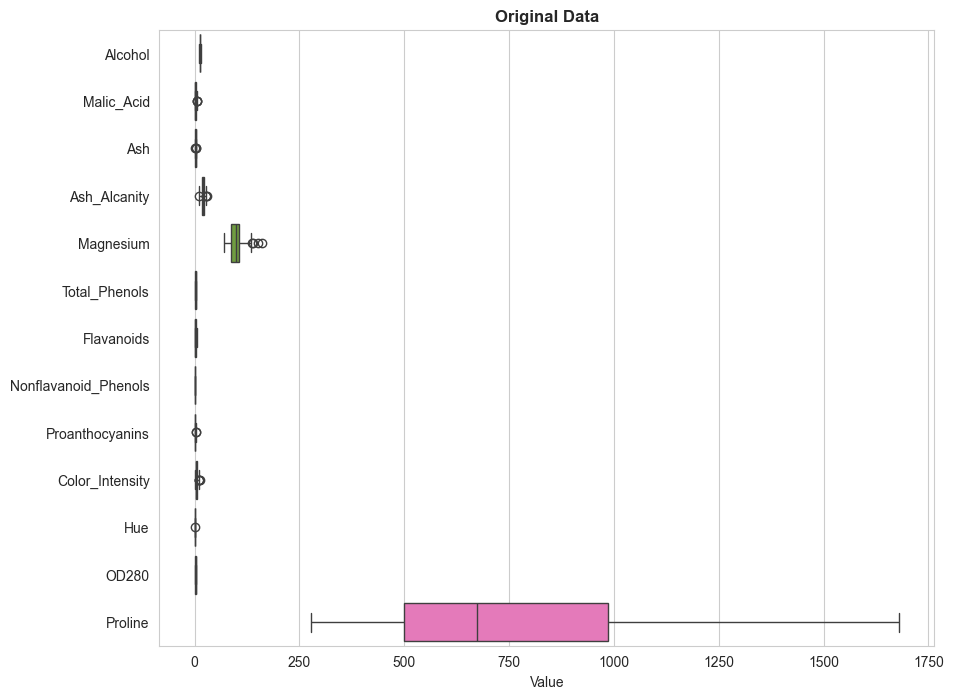

In [5]:
import seaborn as sns

sns.set_style("whitegrid") 
plt.figure(figsize=(10, 8))

ax = sns.boxplot(data=wine_drop, orient='h')
ax.set_title('Original Data', fontweight='bold')
ax.set_xlabel('Value')
plt.xticks(ha='center')
plt.show()


Through the observation of boxplots, we can discern that the Proline variable exhibits a significantly larger range of values and variability compared to other variables. Therefore, it is recommended to standardize this dataset to ensure a more balanced weighting of each variable in the model training process.

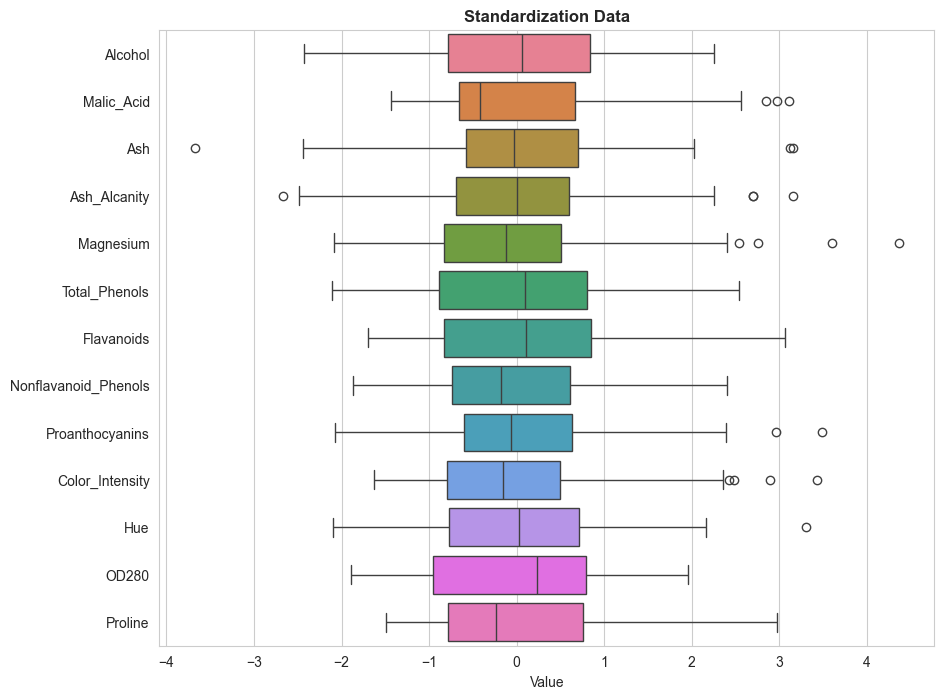

In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
std_wine = pd.DataFrame(scaler.fit_transform(wine_drop), columns=wine_drop.columns)

plt.figure(figsize=(10, 8))
ax = sns.boxplot(data=std_wine, orient='h')
ax.set_title('Standardization Data', fontweight='bold')
ax.set_xlabel('Value')
plt.xticks(ha='center')
plt.show()


Observing the boxplots of standardized data reveals that both the range of values and variability of the variables have been improved, enhancing the comparability between variables.

Display the scatter plot of the standardized data in a two-dimensional plane:

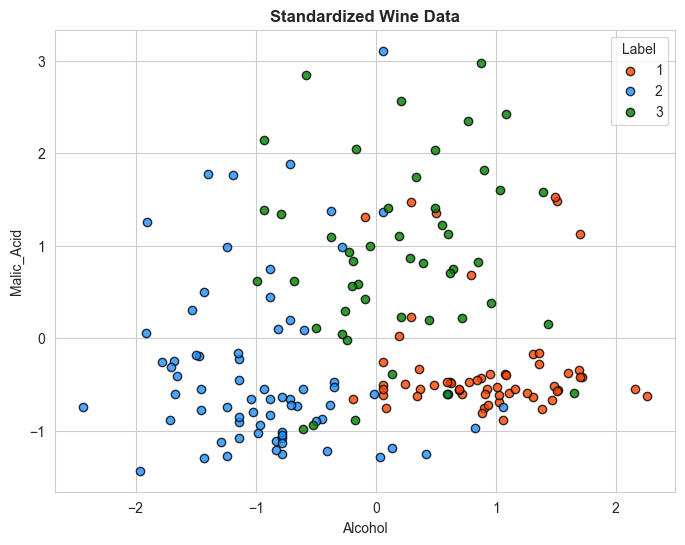

In [7]:
fig, ax = plt.subplots(figsize=(8, 6))
colors = ['orangered', 'dodgerblue', 'green']
labels = wine.iloc[:, -1].unique()
for i, label in enumerate(labels):
    mask = wine.iloc[:, -1] == label
    ax.scatter(std_wine.loc[mask, 'Alcohol'], std_wine.loc[mask, 'Malic_Acid'], c=colors[i], label=label, alpha=0.8, edgecolors='black')

ax.set_xlabel('Alcohol')
ax.set_ylabel('Malic_Acid')
ax.set_title('Standardized Wine Data', fontweight = 'bold')
ax.legend(title = 'Label')
plt.show()


Display the scatter plot of the standardized data in a three-dimensional plane:

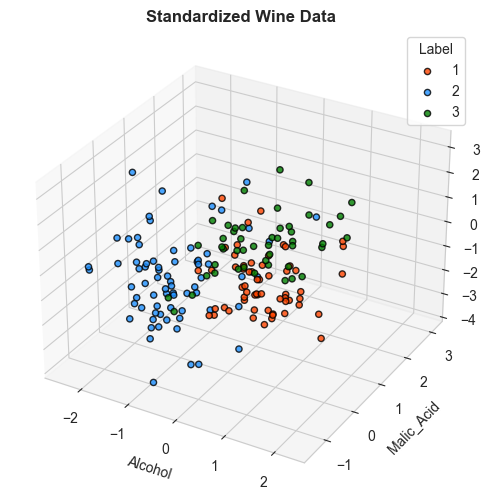

In [8]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

for i, label in enumerate(labels):
    mask = wine.iloc[:, -1] == label
    xs = std_wine.loc[mask, 'Alcohol']
    ys = std_wine.loc[mask, 'Malic_Acid']
    zs = std_wine.loc[mask, 'Ash']
    ax.scatter(xs, ys, zs, c=colors[i], label=label, alpha=0.8, edgecolors='black')

ax.set_xlabel('Alcohol')
ax.set_ylabel('Malic_Acid')
ax.set_zlabel('Ash')
ax.set_title('Standardized Wine Data', fontweight='bold')
ax.legend(title='Label')
plt.show()


### Data Splitting
In machine learning model training, it is common to split the data into training and testing sets. The training data is used to train the model's parameters and weights, serving as the foundation for learning and building the predictive model. The testing data is used to evaluate the model's predictive ability. After training, we use the testing data to assess how well the model generalizes to unseen data. This helps us evaluate the model's performance and decide whether further adjustments are needed.

During the split, random sampling is often employed to ensure that the training and testing sets adequately reflect the characteristics of the original data. The split should be done in such a way that the samples in the training and testing sets are mutually exclusive—meaning any given sample can only appear in one of the sets.

#### Original Data
Splitting the original data into training and testing sets in a 7:3 ratio.

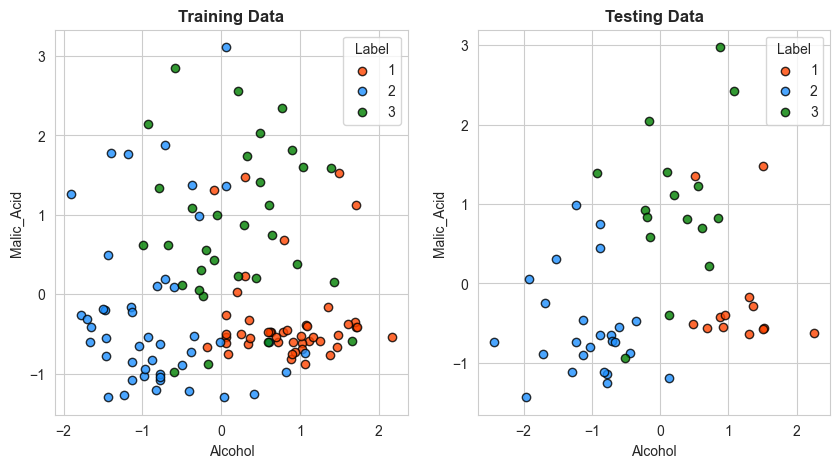

In [9]:
from sklearn.model_selection import train_test_split
wine_train, wine_test, y1_train, y1_test = train_test_split(std_wine, y1, test_size=0.3)

fig, axs = plt.subplots(1, 2, figsize=(10, 5))
for i, label in enumerate(labels):
    mask_train = wine.iloc[:, -1] == label
    axs[0].scatter(wine_train.loc[mask_train, 'Alcohol'], wine_train.loc[mask_train, 'Malic_Acid'], c=colors[i], label=label, alpha=0.8, edgecolors='black')

axs[0].set_xlabel('Alcohol')
axs[0].set_ylabel('Malic_Acid')
axs[0].set_title('Training Data', fontweight='bold')
axs[0].legend(title='Label')

for i, label in enumerate(labels):
    mask_test = wine.iloc[:, -1] == label
    axs[1].scatter(wine_test.loc[mask_test, 'Alcohol'], wine_test.loc[mask_test, 'Malic_Acid'], c=colors[i], label=label, alpha=0.8, edgecolors='black')

axs[1].set_xlabel('Alcohol')
axs[1].set_ylabel('Malic_Acid')
axs[1].set_title('Testing Data', fontweight='bold')
axs[1].legend(title='Label')
plt.show()


#### Principal Component Analysis
**Principal Component Analysis (PCA)** is a commonly used dimensionality reduction technique that transforms high-dimensional data into a lower-dimensional space while preserving most of the original data's information. The basic idea is to project the original data onto new coordinate axes, making the variance along these new axes maximized to capture the major variations in the original data.

Before performing PCA, centering the data is necessary. Next, SVD decomposition is applied to the centered data matrix $\mathbf{X} \in \mathbb{R}^{m \times n}$, resulting in its left singular matrix $\mathbf{U}$, right singular matrix $\mathbf{V}$, and singular value matrix $\mathbf{S}$. The relationship between these matrices can be expressed by the equation:
$$\mathbf{X} = \mathbf{USV^\top}$$
where $\mathbf{U} \in \mathbb{R}^{m \times m}$ and $\mathbf{V} \in \mathbb{R}^{n \times n}$ are orthogonal matrices, and $\mathbf{S} \in \mathbb{R}^{m \times n}$ is a diagonal matrix with singular values on the diagonal.

For the centered data matrix, its covariance matrix can be represented as:
$$\mathbf{\Sigma} = \frac{\mathbf{X^\top X}}{n-1} = \mathbf{V}\frac{\mathbf{S}^2}{n-1}\mathbf{V^\top}$$

where $\sigma_i = \frac{s_i^2}{n-1}$ is the eigenvalue of $\mathbf{\Sigma}$, and the row vectors of $\mathbf{V}$ are the eigenvectors of $\mathbf{\Sigma}$. Since $\mathbf{V}$ is an orthogonal matrix, the data matrix can be projected onto the row space of $\mathbf{V}$:
$$\mathbf{XV} = \mathbf{USV^{\top}V} = \mathbf{US}$$
where each row represents a principal component corresponding to an eigenvalue, and the principal components are pairwise orthogonal. By selecting the top $k$ principal components, the data can be reduced to a $k$-dimensional space for dimensionality reduction. The proportion of data variance explained by each principal component can be observed to evaluate the importance of each component.

Assuming that we choose the top $k$ principal components to reduce the data to a $k$-dimensional space. The proportion of data variance explained by the first $i$ principal components can be calculated using the singular value matrix $\mathbf{S}$. Specifically, if the diagonal elements of $\mathbf{S}$ are $s_1, s_2, \dots, s_n$, then the proportion of data variance explained by the $i$-th principal component is:
$$\frac{s_i^2}{\sum_{j=1}^n s_j^2}$$
Indicating the ratio of the variance explained by the $i$-th principal component to the total data variance.

We will perform PCA on the centered wine data matrix $\mathbf{X} \in \mathbb{R}^{178 \times 13}$ and visualize the explained variance of each principal component using Scree Plot and Pareto Plot.

Note: Python's sklearn package can be used for PCA, and it employs the SVD method as well.

##### Scree Plot

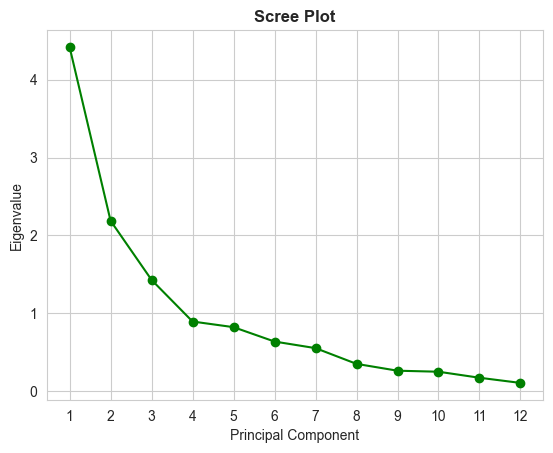

In [10]:
from sklearn.decomposition import PCA 
import numpy as np

wine_ = std_wine.iloc[:, :-1]
pca1 = PCA()
pca1_fit = pca1.fit_transform(wine_)
eigvalues1 = pca1.explained_variance_

plt.plot(np.arange(1, len(eigvalues1) + 1), eigvalues1, 'go-')
plt.title('Scree Plot', fontweight='bold')
plt.xlabel('Principal Component'), plt.ylabel('Eigenvalue')
plt.xticks(np.arange(1, len(eigvalues1) + 1))
plt.show()


According to the eigenvalue trend in the scree plot, the first three principal components contribute significantly, while the later ones show less prominent contributions. Therefore, it is advisable to retain the first three principal components.

##### Pareto Plot

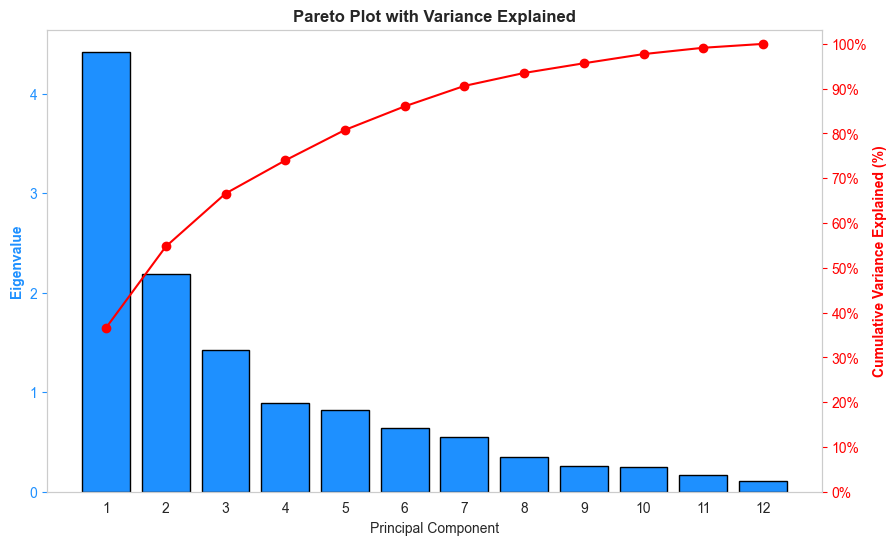

percentage of explained variance = 66.59%


In [11]:
variance_explained = eigvalues1 / sum(eigvalues1)

fig, ax1 = plt.subplots(figsize=(10, 6))
ax1.bar(np.arange(len(eigvalues1)) + 1, eigvalues1, color='dodgerblue', edgecolor='black')
ax1.set_xlabel('Principal Component')
ax1.set_ylabel('Eigenvalue', color='dodgerblue', fontweight='bold')
ax1.tick_params('y', colors='dodgerblue')
ax1.grid(False)

ax2 = ax1.twinx()
ax2.plot(np.arange(len(variance_explained)) + 1, np.cumsum(variance_explained), 'ro-')
ax2.set_ylabel('Cumulative Variance Explained (%)', color='r', fontweight='bold')
ax2.tick_params('y', colors='r')
ax2.set_yticks(np.arange(0, 1.1, 0.1))
ax2.set_yticklabels(['{:,.0%}'.format(x) for x in np.arange(0, 1.1, 0.1)])
ax2.grid(False)

plt.title('Pareto Plot with Variance Explained', fontweight='bold')
plt.xticks(np.arange(1, len(eigvalues1) + 1))
plt.show()

explained_var_ratio = sum(eigvalues1[0:3]) / sum(eigvalues1)
print("percentage of explained variance = {:.2%}".format(explained_var_ratio))


##### Data Transformation
The first three principal components explain 66.59% of the data variance. Therefore, we can use these three principal components for dimensionality reduction. By projecting the centered data matrix $\mathbf{X}$ onto the first three principal components, we obtain the reduced data matrix $\mathbf{Z} \in \mathbb{R}^{178 \times 3}$:

$$\mathbf{Z}=\mathbf{XV}_3=\mathbf{US}_3$$

Here, $\mathbf{V}_3$ is the matrix composed of the first three row vectors of $\mathbf{V}$, and $\mathbf{S}_3$ is the diagonal matrix composed of the first three diagonal elements of $\mathbf{S}$. Each row represents the projection values of a sample onto the first three principal components.

In [12]:
pca1_3D = PCA(n_components=3)
wine_reduced = pca1_3D.fit_transform(std_wine)


Visualize the distribution of the data after PCA transformation in a two-dimensional plane (Principal Component 1 vs. Principal Component 2):

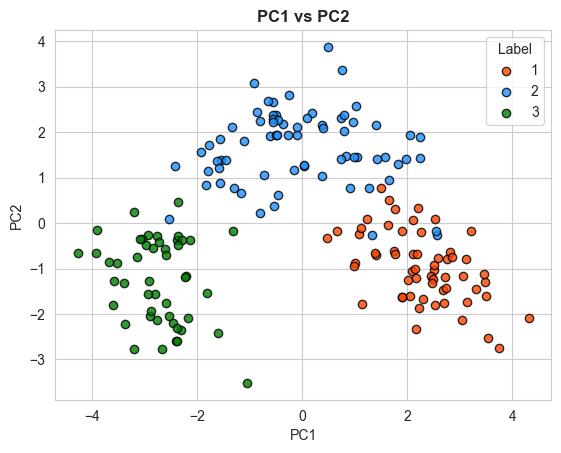

In [13]:
for i, label in enumerate(labels):
    mask = wine.iloc[:, -1] == label
    plt.scatter(wine_reduced[mask, 0], wine_reduced[mask, 1], c=colors[i], label=label, alpha=0.8, edgecolors='black')

plt.title('PC1 vs PC2', fontweight='bold')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(title='Label')
plt.show()


Visualize the distribution of the data after PCA transformation in a three-dimensional space (Principal Component 1, Principal Component 2, and Principal Component 3):

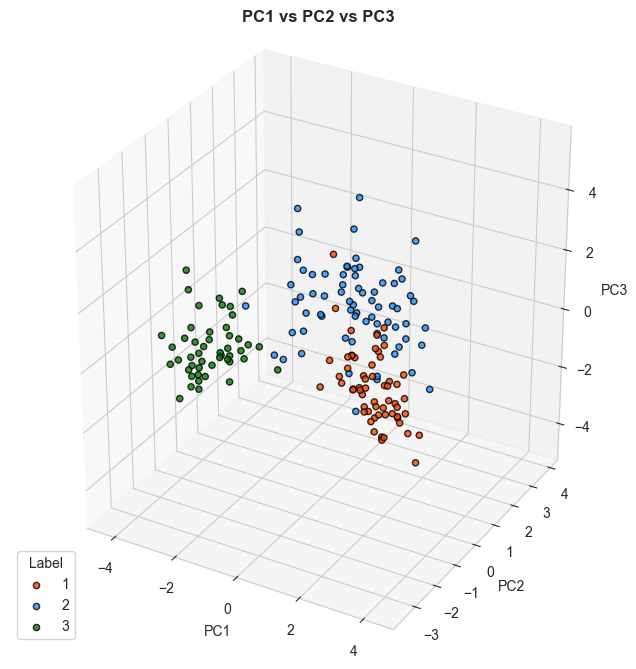

In [14]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
for i, label in enumerate(labels):
    mask = wine.iloc[:, -1] == label
    ax.scatter(wine_reduced[mask, 0], wine_reduced[mask, 1], wine_reduced[mask, 2], c=colors[i], label=label, alpha=0.8, edgecolors='black')
ax.legend(loc='lower left', title='Label')
plt.title('PC1 vs PC2 vs PC3', fontweight='bold')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.set_box_aspect((1, 1, 1.1), zoom=1)
plt.show()


Split the data transformed by principal component analysis into training and testing sets in a 7:3 ratio.

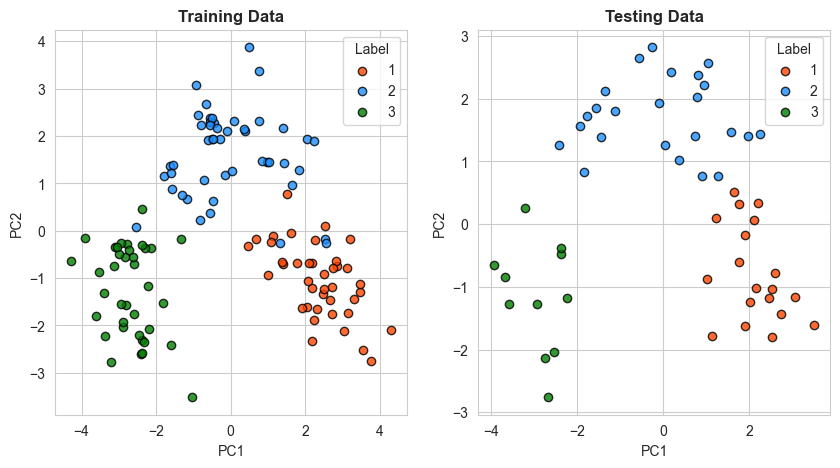

In [15]:
wine_reduced_train, wine_reduced_test, y1_reduced_train, y1_reduced_test = train_test_split(wine_reduced, y1, test_size=0.3)
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

for i, label in enumerate(labels):
    mask_train = y1_reduced_train == label
    axs[0].scatter(wine_reduced_train[mask_train, 0], wine_reduced_train[mask_train, 1], c=colors[i], label=label, alpha=0.8, edgecolors='black')

axs[0].set_xlabel('PC1')
axs[0].set_ylabel('PC2')
axs[0].set_title('Training Data', fontweight = 'bold')
axs[0].legend(title = 'Label')

for i, label in enumerate(labels):
    mask_test = y1_reduced_test == label
    axs[1].scatter(wine_reduced_test[mask_test, 0], wine_reduced_test[mask_test, 1], c=colors[i], label=label, alpha=0.8, edgecolors='black')

axs[1].set_xlabel('PC1')
axs[1].set_ylabel('PC2')
axs[1].set_title('Testing Data', fontweight='bold')
axs[1].legend(title = 'Label')
plt.show()


### Multinomial Logistic Regression
**Multinomial logistic regression** is a commonly used statistical method for exploring relationships among multiple categories. It is an extension of logistic regression and is designed to handle situations with more than two categories.

Let's consider a scenario where we have $m$ samples, each with $n$ feature variables $x_1, x_2, \ldots, x_n$, and a categorical variable $y$ with $k$ categories, labeled as $1, 2, \ldots, k$. Multinomial logistic regression assumes that the distribution of $y$ follows a multinomial distribution, and the probability of each sample being classified into a particular category is determined by its feature variables. Let $p_{ij}$ represent the probability that the $i$-th sample belongs to category $j$, where $i = 1, 2, \ldots, m$ and $j = 1, 2, \ldots, k$, with the constraint $\sum_{j=1}^k p_{ij} = 1$. Each value of $y$ has an associated parameter vector $\boldsymbol{\beta}_j = (\beta_{0j}, \beta_{1j}, \ldots, \beta_{nj})^\top$, where $\beta_{0j}$ is the intercept. The probability model for multinomial logistic regression can be expressed as:

$$p_{ij} = \frac{e^{\boldsymbol{\beta}_j \boldsymbol{x}^\top}}{\sum_{r=1}^k e^{\boldsymbol{\beta}_r \boldsymbol{x}^\top}}$$

The parameters of the multinomial logistic regression model are obtained by maximizing the likelihood function. The likelihood function is given by:

$$\operatorname{L}(\boldsymbol{\beta}) = \prod_{i=1}^m \prod_{j=1}^k p_{ij}^{y_{ij}}$$

where $y_{ij}$ is an indicator function that equals 1 when the $i$-th sample belongs to category $j$ and 0 otherwise. The maximum likelihood estimation of the parameters is given by:

$$\hat{\boldsymbol{\beta}} = \underset{\boldsymbol{\beta}}{\operatorname{argmax}}\ \operatorname{L}(\boldsymbol{\beta})$$

To prevent overfitting, regularization terms are often added to the likelihood function to constrain the size of the parameters. Common regularization methods include L1 and L2 regularization. In the presence of regularization, the optimal parameters for multinomial logistic regression are obtained by maximizing the regularized likelihood function:

$$\hat{\beta} = \underset{\boldsymbol{\beta}}{\operatorname{argmax}}\ \operatorname{L}(\boldsymbol{\beta}) - \lambda \sum_{j=1}^k \sum_{l=0}^n |\beta_{jl}|^q$$

Here, $\lambda$ is the regularization parameter, $q=1$ corresponds to L1 regularization, and $q=2$ corresponds to L2 regularization.

However, in practical applications, it is more common to use the cross-entropy loss function for optimization. The cross-entropy loss function is preferred for several reasons:
1. It is easier to optimize, as compared to the likelihood function, and can be minimized using standard optimization algorithms such as gradient descent.

2. The cross-entropy loss function is convex, making it more amenable to common optimization techniques.

3. It provides better resistance to overfitting by penalizing extreme values of predicted probabilities, leading to sharper distinctions between different categories.

Now, let's define the cross-entropy loss function for multinomial logistic regression. For a model with $m$ samples and $k$ categories, the loss function is defined as:

$$\operatorname{J}(\boldsymbol{\beta}) = -\frac{1}{m} \sum_{i=1}^m \sum_{j=1}^k y_{ij} \log p_{ij}$$

Here, $y_{ij}$ represents whether the true category of the $i$-th sample is $j$, and $p_{ij}$ is the predicted probability of the $i$-th sample belonging to category $j$.

In the context of multinomial logistic regression, the loss function with added regularization terms and its gradient are given by:

$$\operatorname{J}(\boldsymbol{\beta}) = -\frac{1}{m} \sum_{i=1}^m \sum_{j=1}^k y_{ij} \log p_{ij} + \frac{\lambda}{2m} \sum_{j=1}^k \sum_{l=0}^n |\beta_{jl}|^n$$

$$\frac{\partial\operatorname{J}(\boldsymbol{\beta})}{\partial\beta_{jl}} = \frac{1}{m} \sum_{i=1}^m x_{il}(p_{ij}-y_{ij}) + \frac{\lambda}{m} |\beta_{jl}|^{q-1} \operatorname{sign}(\beta_{jl})$$

#### Original Data
##### Model Training
Training a model is a crucial step in machine learning, aiming to learn a model from sample data for making predictions on new data. Given that the chosen loss function is the cross-entropy loss function, how do we minimize it to obtain the optimal parameters? One common algorithm for this purpose is **LBFGS (Limited-memory Broyden-Fletcher-Goldfarb-Shanno)**, used for minimizing convex loss functions (cross-entropy loss function is convex).

Firstly, the loss function of multinomial logistic regression is transformed into vector form:

$$\operatorname{J}(\boldsymbol{\beta}) = -\frac{1}{m}\operatorname{Tr}(\mathbf{Y}^{\top}\log \mathbf{P}) + \frac{\lambda}{2m}\|\boldsymbol{\beta}\|_q^q$$

Here, $\mathbf{Y}$ is an $m \times k$ matrix with elements $y_{ij}$, and $\mathbf{P}$ is an $m \times k$ matrix with elements $p_{ij}$.

Next, the gradient of the loss function is expressed in vector form:

$$\frac{\partial\operatorname{J}(\boldsymbol{\beta})}{\partial\boldsymbol{\beta}} = -\frac{1}{m}\mathbf{X}^\top(\mathbf{Y}-\mathbf{P}) + \frac{\lambda}{m}\boldsymbol{\beta}\circ\boldsymbol{\omega}$$

Here, $\mathbf{X}$ is an $m \times n$ matrix with elements $x_{il}$, $\circ$ denotes element-wise multiplication, and $\boldsymbol{\omega}$ is a $k$-dimensional vector with the $j$-th element $|\beta_{1j}|^{q-2}\operatorname{sign}(\beta_{1j})$.

Finally, the LBFGS algorithm is employed to find the optimal parameters $\boldsymbol{\beta}$ that minimize the loss function. The process is as follows:

1. **Initialization**: Initialize $\boldsymbol{\beta}$ to any values. Common choices include a zero vector or a vector sampled randomly from a Gaussian distribution.

2. **Compute loss function and gradient**: Calculate the current values of the loss function and the gradient vector corresponding to the current $\boldsymbol{\beta}$.

3. **Compute search direction**: Use the LBFGS algorithm to estimate the inverse of the current Hessian matrix based on past gradients and parameter updates. This helps in calculating the search direction, which is the direction that maximally reduces the loss function.

4. **Determine step size**: Use line search to determine the step size, ensuring that moving a certain distance along the search direction maximally reduces the loss function. Common methods for line search include binary search, Armijo backtracking, Wolfe conditions, etc.

5. **Update parameters**: Update the parameters using the step size and search direction, i.e., $\boldsymbol{\beta} \leftarrow \boldsymbol{\beta} + \alpha \mathbf{d}$, where $\alpha$ is the step size, and $\mathbf{d}$ is the search direction.

6. **Check stopping conditions**: Check if the predefined stopping conditions are met, such as the gradient magnitude being below a certain threshold or the number of iterations exceeding a threshold. If the conditions are met, end the iterations; otherwise, return to step 2.

In the context of the LBFGS algorithm, we need to solve the following equation to estimate the inverse of the current Hessian matrix:

$$\mathbf{H}_k \mathbf{y}_k = \mathbf{s}_k$$

Here, $\mathbf{H}_k$ is an approximate Hessian matrix, and $\mathbf{y}_k$ and $\mathbf{s}_k$ are vectors representing the gradient difference and parameter difference, respectively, from the most recent $m$ iterations. The solution $\mathbf{y}_k$ to this equation is the desired search direction.

Due to the often high computational cost of calculating $\mathbf{H}_k$ in practical applications, the LBFGS algorithm employs an approximate method to compute the inverse of $\mathbf{H}_k$. Specifically, a memory buffer of length $m$ is maintained, storing the gradient differences and parameter differences from the most recent $m$ iterations. Subsequently, an approximate inverse of $\mathbf{H}_k$ is calculated based on linear combinations of these vectors. The following formula is used to update the inverse of $\mathbf{H}_k$:

$$\begin{aligned}
\mathbf{r} &= \frac{1}{\rho_k}(\mathbf{y}_k - \mathbf{H}_k \mathbf{s}_k), \\
\mathbf{q} &= \mathbf{H}_k \mathbf{r}, \\
\alpha_i &= \frac{\rho_i}{\mathbf{s}_i^\top \mathbf{y}_i}, \text{ for } i=k, k-1, \dots, k-m+1, \\
\mathbf{z} &= \alpha_1 \mathbf{q} + \alpha_2 \mathbf{y}_{k-1} - \alpha_2 \mathbf{H}_{k-1} \mathbf{s}_{k-1} + \dots + \alpha_m \mathbf{y}_{k-m+1} - \alpha_m \mathbf{H}_{k-m+1} \mathbf{s}_{k-m+1}, \\
\mathbf{d} &= -\mathbf{z}.
\end{aligned}$$

Here, $\rho_k = 1 / \mathbf{y}_k^\top \mathbf{s}_k$ is a scalar, $\mathbf{r}$ and $\mathbf{q}$ are two vectors in the LBFGS algorithm, $\alpha_i$ are coefficients, $\mathbf{z}$ is a vector in the LBFGS algorithm, and $\mathbf{d}$ is the search direction.

By following these steps, we can estimate the inverse of the current Hessian matrix using an approximate approach within the LBFGS algorithm. This process is an integral part of training the multinomial logistic regression model using the <span style="color:red">training data</span> for wine.

Note: In Python, when using the sklearn package's multinomial logistic regression classifier, the default behavior is to use L2-regularized cross-entropy loss function for parameter estimation, and the LBFGS algorithm is employed for minimization.

In [16]:
from sklearn.linear_model import LogisticRegression
multlog_reg = LogisticRegression(multi_class="multinomial")
multlog_reg.fit(wine_train, y1_train)
multlog_reg.coef_


array([[ 6.68680034e-01,  1.80177006e-01,  4.40396380e-01,
        -8.40972405e-01,  5.84211934e-02,  2.57851199e-01,
         5.87966224e-01, -1.84496375e-01,  2.16663453e-01,
         1.25083269e-01,  1.17606327e-01,  7.19655937e-01,
         1.04462635e+00],
       [-7.82427601e-01, -3.71885880e-01, -7.36971785e-01,
         5.80110167e-01, -6.61465214e-02,  2.86384351e-02,
         3.43160237e-01,  1.84111879e-01,  2.23021031e-01,
        -9.68820860e-01,  5.06763268e-01,  8.32927914e-02,
        -1.12442632e+00],
       [ 1.13747567e-01,  1.91708873e-01,  2.96575406e-01,
         2.60862238e-01,  7.72532802e-03, -2.86489634e-01,
        -9.31126462e-01,  3.84496208e-04, -4.39684484e-01,
         8.43737591e-01, -6.24369595e-01, -8.02948728e-01,
         7.97999698e-02]])

The estimated parameters $\boldsymbol{\beta}$ are as described above.

##### Model Evaluation
After training the model, various metrics and techniques can be employed to assess the performance during the training process. This aids in adjusting the model, and the simplest approach is to calculate the training accuracy (the accuracy of predictions made by the model during training).

In [17]:
from sklearn.metrics import accuracy_score
y_train_pred = multlog_reg.predict(wine_train)
print(f'training accuracy : {accuracy_score(y1_train, y_train_pred):.2%}')


training accuracy : 100.00%


Upon examining the results, it is observed that the training accuracy is unexpectedly 100%. Is such a result reasonable? Additionally, what other methods are available for evaluation?

##### Cross-Validation (CV)
**Cross-validation** is a commonly used method for training and evaluating machine learning models. It involves partitioning the data into multiple subsets, with each subset taking turns as the testing data while the remaining subsets serve as the training data. This ensures that each sample in the data is used for validating the model, allowing the model to learn from a larger portion of the data.

The most common form of cross-validation is K-fold cross-validation. In K-fold cross-validation, the data is divided into K non-overlapping subsets. The model is trained K times, each time using one of the subsets as the validation set and the remaining subsets as the training set. Ultimately, the average cross-validation score from the K training sets is used to assess the model's performance, helping to determine whether the model generalizes well to unseen data.

Performing K-fold cross-validation (with K = 3) on the model (validating training accuracy):

In [18]:
from sklearn.model_selection import cross_val_score
y1_scores = cross_val_score(multlog_reg, wine_train, y1_train, cv=3, scoring='accuracy')
for i in range(len(y1_scores)):
    print("training accuracy of fold {} : {:.2%}".format(i + 1, y1_scores[i]))


training accuracy of fold 1 : 97.62%
training accuracy of fold 2 : 95.12%
training accuracy of fold 3 : 100.00%


Based on the results of cross-validation, there is consistently extremely high training accuracy across all folds. Are there other ways to evaluate the model?

##### Confusion Matrix

The **Confusion Matrix** is a common tool for evaluating models. While it is typically used for analyzing binary classification problems, it can be extended to multiclass problems. In a multiclass setting, the confusion matrix is similar to that in binary classification, but it provides combinations for all possible predictions and true values.

Here is an example of a confusion matrix for a three-class problem:

|            |   Predicted Class   |   Predicted Class   |   Predicted Class   |
|------------|---------------------|---------------------|---------------------|
| Actual Class 1 |  True Negative (TN)  |  False Positive (FP) |  False Positive (FP) |
| Actual Class 2 |  False Positive (FP) |  True Negative (TN)  |  False Negative (FN) |
| Actual Class 3 |  False Positive (FP) |  False Negative (FN) |  True Negative (TN)  |

Here, True Negative (TN) indicates both the actual and predicted classes are negative, False Positive (FP) signifies the actual class is negative but predicted as positive, False Negative (FN) denotes the actual class is positive but predicted as negative, and True Positive (TP) signifies both the actual and predicted classes are positive.

In [19]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

y1_train_pred_cv = cross_val_predict(multlog_reg, wine_train, y1_train, cv=3)
conf_mx1 = confusion_matrix(y1_train, y1_train_pred_cv)
conf_mx1


array([[46,  0,  0],
       [ 0, 43,  3],
       [ 0,  0, 32]])

According to the confusion matrix, the model's performance in classification during training is excellent, with only three misclassifications.

##### F1 Score
In machine learning, the **F1 score** is a metric used to evaluate the performance of a binary classifier, combining both precision and recall. Precision measures the proportion of true positive predictions among all positive predictions, while recall measures the proportion of actual positive instances correctly predicted by the model. For multiclass classification problems, a multiclass F1 score is employed, where a higher value indicates better classification performance.

For a classification problem with $k$ classes, computing the F1 score involves three steps:

1. Calculate the F1 score for each class. For the $i$-th class, compute the number of true positives ($\operatorname{TP}_i$), false positives ($\operatorname{FP}_i$), and false negatives ($\operatorname{FN}_i$). Then, compute the F1 score using the formula:

   $$\operatorname{F1}_i = \frac{2 \times \operatorname{TP}_i}{2 \times \operatorname{TP}_i + \operatorname{FP}_i + \operatorname{FN}_i} = 2 \times \frac{\text{precision} \times \text{recall}}{\text{precision} + \text{recall}}$$

2. Take the average of all class F1 scores. The final multiclass F1 score is given by:

   $$\operatorname{F1} = \frac{1}{k} \sum_{i=1}^{k} \operatorname{F1}_i$$

Note: In Python, when using the F1 score from the sklearn package for multiclass classification, setting the `average` parameter to 'macro' computes the average as described above. If you want to assign different weights to each class, you can adjust the parameter to 'weighted'.

In [20]:
from sklearn.metrics import f1_score
f1_score(y1_train, y1_train_pred_cv, average="macro")


0.9738386718094919

The F1 score is 0.9738, indicating that the model achieves excellent classification performance on the training data. Based on the evaluation results above, it suggests that the model performs exceptionally well during the training process, and further adjustments may not be necessary.

#### Model Testing
In machine learning, testing the model involves using independent test data to assess the performance of the trained model. The main purpose is to determine how well the model generalizes to unseen data. Based on the previous results, the model exhibited excellent performance during the training process. How does it perform when facing unknown data (the separated test data)?

In [21]:
y1_pred = multlog_reg.predict(wine_test)
print(f'accuracy : {accuracy_score(y1_test, y1_pred):.2%}')


accuracy : 100.00%


The model performs exceptionally well on the test data, achieving an impressive prediction accuracy of 100%.

In addition to LBFGS, there are several other algorithms for minimizing the loss function, such as Newton's Method, Newton-CG Method, and SAG (Stochastic Average Gradient) Method.

#### Optimization Algorithm

##### Newton's Method and Newton-CG Method
**Newton's Method** is an optimization algorithm for finding the minimum of a non-linear function. The specific steps for minimizing the loss function are as follows (assuming the gradient and Hessian matrix of the loss function are available):

Initialize parameters $\boldsymbol{\beta}^{(0)}$.

For $t=0,1,2,\ldots$, perform the following steps:

1. Compute the gradient vector $\nabla\operatorname{J}(\boldsymbol{\beta}^{(t)})$ and the Hessian matrix $\mathbf{H}(\boldsymbol{\beta}^{(t)})$.

2. Solve the equation $\mathbf{H}(\boldsymbol{\beta}^{(t)})\Delta\boldsymbol{\beta}^{(t)}=-\nabla\operatorname{J}(\boldsymbol{\beta}^{(t)})$ to obtain the update vector $\Delta\boldsymbol{\beta}^{(t)}$.

3. Update parameters $\boldsymbol{\beta}^{(t+1)}=\boldsymbol{\beta}^{(t)}+\Delta\boldsymbol{\beta}^{(t)}$.

4. Stop the iteration when $|\Delta\boldsymbol{\beta}^{(t)}|$ is small.

In the above steps, $\mathbf{H}(\boldsymbol{\beta})$ is the Hessian matrix of the loss function $\operatorname{J}(\boldsymbol{\beta})$, and $\Delta\boldsymbol{\beta}$ is the update vector.

When solving the equation $\mathbf{H}(\boldsymbol{\beta})\Delta\boldsymbol{\beta}=-\nabla\operatorname{J}(\boldsymbol{\beta})$, Newton's Method aims to expand the objective function around $\boldsymbol{\beta}^{(t)}$ into a quadratic Taylor polynomial and then solve for the minimum of this polynomial. The solution for $\Delta\boldsymbol{\beta}$ is given by:

$$\Delta\boldsymbol{\beta}^{(t)} = -(\mathbf{H}(\boldsymbol{\beta}^{(t)}))^{-1}\nabla\operatorname{J}(\boldsymbol{\beta}^{(t)})$$

Therefore, in each iteration, we can obtain the update vector by solving a linear system. Newton's Method often converges quickly but requires the computation and storage of the Hessian matrix, which can be computationally expensive. Additionally, it may encounter difficulties when the Hessian matrix is not positive definite.

To address some of these issues, the **Newton-CG Method (Newton Conjugate Gradient)** combines Newton's Method with the Conjugate Gradient method.

##### SAG Algorithm
The **SAG (Stochastic Average Gradient)** algorithm is a stochastic optimization algorithm used for solving optimization problems, particularly suitable for large-scale data.

The SAG algorithm uses Gradient Descent to update the model parameters $\boldsymbol{\beta}$ by randomly selecting one sample for updating in each iteration. Assuming we select the $i$-th sample, its gradient is given by:

$$\frac{\partial\operatorname{J}(\boldsymbol{\beta})}{\partial\beta_{jl}}\bigg|_{i}=\frac{1}{m}\sum_{j=1}^k x_{il}(p_{ij}-y_{ij})+\frac{\lambda}{m}|\beta_{jl}|^{q-1}\operatorname{sign}(\beta_{jl})$$

Next, the SAG algorithm updates the model parameters $\boldsymbol{\beta}$ using the average gradient:

$$\boldsymbol{\beta}_{t+1}=\boldsymbol{\beta}_{t}-\alpha\bigg(\frac{1}{m}\sum_{i=1}^m\frac{\partial\operatorname{J}(\boldsymbol{\beta})}{\partial\boldsymbol{\beta}}\bigg|_{i}+\frac{\lambda}{m}\boldsymbol{\beta}_{t}\bigg)$$

Here, $\alpha$ is the learning rate, and $\boldsymbol{\beta}_t$ represents the model parameters after the $t$-th iteration.

To improve convergence speed, a momentum term can be added during the parameter update (Momentum):

$$\boldsymbol{v}_{t}=\gamma \boldsymbol{v}_{t-1}+\frac{1}{m}\sum_{i=1}^m\frac{\partial\operatorname{J}(\boldsymbol{\beta})}{\partial\boldsymbol{\beta}}\bigg|_{i}+\frac{\lambda}{m}\boldsymbol{\beta}_{t}$$

$$\boldsymbol{\beta}_{t+1}=\boldsymbol{\beta}_{t}-\alpha \boldsymbol{v}_t$$

Here, $\gamma$ is the momentum coefficient, typically set to 0.9.

Finally, check whether the default stopping conditions are met. If the stopping conditions are met, end the iteration.

Comparing these methods can help choose the optimization algorithm that is most suitable for a specific problem, as their performance may vary under different conditions. We will empirically compare the performance of the Newton Conjugate Gradient, SAG, and LBFGS optimization methods:

In [22]:
import time
def compare_multlog_reg_solvers(solvers, wine_train, y_train, wine_test, y_test):
    for solver in solvers:
        multlog_reg_compare = LogisticRegression(multi_class='multinomial', solver=solver)
        start_time = time.time()  
        multlog_reg_compare.fit(wine_train, y_train)
        end_time = time.time()  
        train_time = end_time - start_time  
        y_pred = multlog_reg_compare.predict(wine_test)
        accuracy = accuracy_score(y_test, y_pred)
        y_scores = cross_val_score(multlog_reg_compare, wine_train, y_train, cv=3, scoring='accuracy')
        f1 = f1_score(y_test, y_pred, average='macro')
        print(f'Solver : {solver}')
        print(f'Test accuracy : {accuracy:.2%}')
        print(f'F1 score : {f1:.2%}')
        print(f'Mean cross validation scores : {np.mean(y_scores) * 100:.2f}%')
        print(f'Train time : {train_time:.2f} seconds\n')

solvers = ['newton-cg', 'sag', 'lbfgs']
compare_multlog_reg_solvers(solvers, wine_train, y1_train, wine_test, y1_test)


Solver : newton-cg
Test accuracy : 100.00%
F1 score : 100.00%
Mean cross validation scores : 97.58%
Train time : 0.01 seconds

Solver : sag
Test accuracy : 100.00%
F1 score : 100.00%
Mean cross validation scores : 97.58%
Train time : 0.00 seconds

Solver : lbfgs
Test accuracy : 100.00%
F1 score : 100.00%
Mean cross validation scores : 97.58%
Train time : 0.00 seconds



From the results, the three optimization methods exhibit the same predictive accuracy, F1 score, and average training accuracy from cross-validation, which are 97.58%. This indicates that all three optimization methods yield excellent model performance. However, the training times vary among the methods, with the Newton Conjugate Gradient method taking 0.01 seconds, slightly longer than LBFGS and SAG, which are 0.00. Although the difference may seem small, it could become significant for larger datasets. This discrepancy might be attributed to the fact that the Newton Conjugate Gradient method involves the computation and storage of the Hessian matrix (LBFGS approximates it), leading to higher computational costs.

#### Principal Component Data

##### Model Training
Training the model using the principal component training data of wine, estimating the parameters of the multinomial logistic regression model through the use of the LBFGS algorithm for the cross-entropy loss function.

In [23]:
multlog_reg1_reduced = LogisticRegression(multi_class="multinomial")
multlog_reg1_reduced.fit(wine_reduced_train, y1_reduced_train)
multlog_reg1_reduced.coef_


array([[ 1.02782913, -0.78113578, -0.28427366],
       [ 0.16355149,  1.99846748,  0.6212675 ],
       [-1.19138063, -1.21733169, -0.33699385]])

The estimated parameters $\boldsymbol{\beta}$ are as shown above. Since the principal component data has been reduced to three dimensions, $\boldsymbol{\beta_j} \in \mathbb{R}^{3}$.

##### Model Evaluation

In [24]:
y1_reduced_train_pred = multlog_reg1_reduced.predict(wine_reduced_train)
print(f'training accuracy : {multlog_reg1_reduced.score(wine_reduced_train, y1_reduced_train_pred):.2%}')


training accuracy : 100.00%


The training performance of the model is exceptionally perfect, with a training accuracy of 100%.

##### Cross-Validation (CV)
Performing k-fold cross-validation with k = 3 for model evaluation (validating training accuracy):

In [25]:
y1_reduced_scores = cross_val_score(multlog_reg1_reduced, wine_reduced_train, y1_reduced_train, cv=3, scoring='accuracy')
for i in range(len(y1_reduced_scores)):
    print("training accuracy of fold {}: {:.2%}".format(i + 1, y1_reduced_scores[i]))


training accuracy of fold 1: 97.62%
training accuracy of fold 2: 97.56%
training accuracy of fold 3: 97.56%


According to the results of cross-validation, fold 1 exhibits a remarkable training accuracy of 97.62%, while fold 2 and fold 3 show slightly lower values at 97.56%.

##### Confusion Matrix

In [26]:
y1_reduced_train_pred_cv = cross_val_predict(multlog_reg1_reduced, wine_reduced_train, y1_reduced_train, cv=3)
conf_mx1_reduced = confusion_matrix(y1_reduced_train, y1_reduced_train_pred_cv)
conf_mx1_reduced


array([[39,  1,  0],
       [ 1, 45,  1],
       [ 0,  0, 37]])

According to the confusion matrix, the model's classification performance during training is good, with only three mispredictions.

##### F1 score

In [27]:
f1_score(y1_reduced_train, y1_reduced_train_pred_cv, average="macro")


0.9764695340501793

With an F1 score of 0.9765, it indicates that the model achieves excellent classification performance on the training data. Based on the above evaluation results, it shows that the model performs exceptionally well during training, and there is no need for further adjustments.

##### Model Testing

In [28]:
y1_reduced_pred = multlog_reg1_reduced.predict(wine_reduced_test)
print(f'accuracy : {accuracy_score(y1_reduced_test, y1_reduced_pred):.2%}')


accuracy : 96.30%


The model exhibits excellent predictive performance on the test data, achieving an accuracy as high as 96.3%.

##### Optimization Algorithm
Compare the performance of the Newton Conjugate Gradient, SAG, and LBFGS:

In [29]:
compare_multlog_reg_solvers(solvers, wine_reduced_train, y1_reduced_train, wine_reduced_test, y1_reduced_test)


Solver : newton-cg
Test accuracy : 96.30%
F1 score : 96.81%
Mean cross validation scores : 97.58%
Train time : 0.00 seconds

Solver : sag
Test accuracy : 96.30%
F1 score : 96.81%
Mean cross validation scores : 97.58%
Train time : 0.00 seconds

Solver : lbfgs
Test accuracy : 96.30%
F1 score : 96.81%
Mean cross validation scores : 97.58%
Train time : 0.00 seconds



From the results, it can be observed that the three optimization methods have the same predictive accuracy, F1 score, and average training accuracy from cross-validation, which are 96.30%, 96.81%, and 97.58%, respectively. This indicates that all three optimization methods exhibit excellent model performance. 

#### Comparison
Evaluating the performance of original data versus principal component data in the same model can help us choose the optimal data preprocessing method. If using principal component analysis significantly improves the model's performance, then we might consider using PCA. Conversely, if there is no clear improvement in model performance, we may choose to use the original data.

Here is the performance comparison of the two types of data in logistic regression:

**Original Data**

| Solver | Test Accuracy | F1 Score | Mean Cross Validation Scores | Train Time |
|--------|--------------|----------|------------------------------|------------|
| newton-cg | 100% | 100% | 97.58% | 0.01 seconds |
| sag | 100% | 100% | 97.58% | 0.00 seconds |
| lbfgs | 100% | 100% | 97.58% | 0.00 seconds |

**Principal Component Data**

| Solver | Test Accuracy | F1 Score | Mean Cross Validation Scores | Train Time |
|--------|--------------|----------|------------------------------|------------|
| newton-cg | 96.3% | 96.81% | 97.58% | 0.00 seconds |
| sag | 96.3% | 96.81% | 97.58% | 0.00 seconds |
| lbfgs | 96.3% | 96.81% | 97.58% | 0.00 seconds |

From the table, it can be observed that the performance using original data is slightly better than that of principal component data. However, the execution time for the data after principal component analysis is shorter than using the original data.

### Support Vector Machine (SVM)
**Support Vector Machine (SVM)** is a commonly used machine learning method for binary and multiclass classification problems. The goal of SVM is to find the optimal hyperplane in the feature space that separates samples from different classes.

The core idea of SVM is to find a hyperplane that maximizes the classification margin. The classification margin is the distance between the hyperplane and the nearest sample points, which are called support vectors.

Assuming we have $m$ samples, each with $n$ feature variables $\boldsymbol{x}_1, \boldsymbol{x}_2, \ldots, \boldsymbol{x}_n$, and a binary class variable $\boldsymbol{y}$ with values of $+1$ or $-1$. We want to find a hyperplane $\boldsymbol{w}^\top\boldsymbol{x} + b = 0$ that maximizes the classification margin, separating all samples into classes $+1$ and $-1$. Here, $\boldsymbol{w}$ is the weight vector, and $b$ is the bias term.

We can represent all samples as $y_i(\boldsymbol{w}^\top\boldsymbol{x}_i + b)$, where $y_i$ is either $+1$ or $-1$, and the classification margin is simplified to $\frac{2}{\|\boldsymbol{w}\|}$. Therefore, our goal is to maximize the following function:

$$\max_{\boldsymbol{w}, b} \frac{2}{\|\boldsymbol{w}\|}$$

Subject to the constraints:

$$y_i(\boldsymbol{w}^\top\boldsymbol{x}_i + b) \geq 1, \quad i = 1, 2, \ldots, m$$

The meaning of the constraints is that all samples should be correctly classified, i.e., the classification margin should be at least 1.

To prevent overfitting, a regularization term is added to the objective function, resulting in:

$$\min_{\boldsymbol{w}, b} \frac{1}{2}\|\boldsymbol{w}\|^2 + C\sum_{i=1}^m\xi_i$$

Here, $\xi_i$ is the slack variable, allowing some samples to have a classification margin less than 1. $C$ is the regularization parameter, balancing the trade-off between maximizing the classification margin and minimizing classification errors.

Additionally, converting the original SVM problem into a dual problem makes it computationally convenient. The objective function for the dual problem is:

$$\min_{\boldsymbol{\alpha}} \frac{1}{2}\sum_{i,j=1}^m \alpha_i\alpha_jy_iy_j\boldsymbol{x}_i^\top\boldsymbol{x}_j - \sum_{i=1}^m \alpha_i$$

Here, $\boldsymbol{\alpha} = (\alpha_1, \alpha_2, \ldots, \alpha_m)^\top$ is the Lagrange multiplier, subject to the constraints:

$$\sum_{i=1}^m \alpha_iy_i = 0$$
$$0 \leq \alpha_i \leq C, \quad i = 1, 2, \ldots, m$$

Optimizing the dual problem with certain optimization methods yields the optimal Lagrange multiplier $\boldsymbol{\alpha}^*$.

According to the Karush-Kuhn-Tucker (KKT) conditions, when $\alpha_i^* > 0$, the sample point $(\boldsymbol{x}_i, y_i)$ is a support vector. Therefore, the optimal hyperplane can be represented as:

$$\boldsymbol{w}^* = \sum_{i=1}^m \alpha_i^*y_i\boldsymbol{x}_i$$

$$b^* = y_i - \boldsymbol{w}^{*\top}\boldsymbol{x}_i, \quad i : \alpha_i^* > 0$$

Here, $i : \alpha_i^* > 0$ denotes the indices of all support vectors.

Typically, SVM uses a kernel to map the low-dimensional feature space to a high-dimensional feature space, improving classification accuracy. By using a kernel, SVM can find a nonlinear hyperplane in the low-dimensional feature space, achieving linear classification in the high-dimensional feature space. The kernel is a crucial component of SVM and a key reason for its excellent performance.

The SVM kernel calculates the similarity between two samples by computing their inner product after mapping them to a high-dimensional feature space. That is:

$$ K(\boldsymbol{x}_i, \boldsymbol{x}_j) = \phi(\boldsymbol{x}_i)^\top \phi(\boldsymbol{x}_j) $$

Here, $\phi(\cdot)$ is a mapping function that maps the original features to the high-dimensional feature space. Through the kernel, we can directly calculate the inner product in the high-dimensional feature space without explicitly computing the mapping function, saving computational time and space. When solving the dual problem, we can use the kernel function to calculate the inner product between samples, obtaining the inner product in a higher-dimensional feature space and ultimately obtaining the Lagrange multiplier $\boldsymbol{\alpha}^*$. Finally, we can use $\boldsymbol{\alpha}^*$ to calculate the weight vector $\boldsymbol{w}$ and bias term $b$, obtaining the optimal hyperplane.

In binary class SVM, a single separating hyperplane (a line or plane) is used to distinguish two different classes. However, when there are multiple classes, using a single hyperplane to distinguish all classes can become challenging. Therefore, multiclass SVMs typically use a strategy called "one-vs-one" to address this issue. In this strategy, we pair each class with every other class and train a binary class SVM for each pair. When classifying new data, we compare it with all SVM models and choose the class that is most frequently classified as positive as the final classification result.

Note:

The Karush-Kuhn-Tucker (KKT) conditions are an important theorem in optimization theory, used to determine whether a solution to an optimization problem satisfies certain conditions.

For a standard convex optimization problem, KKT conditions typically include the following four parts:

1. The optimal solution $\boldsymbol{x}^*$ must satisfy the original constraints $g_i(\boldsymbol{x}^*) \leq 0$ and $h_j(\boldsymbol{x}^*) = 0$.

2. The optimal Lagrange multipliers $\boldsymbol{\alpha}^*$ must satisfy $\boldsymbol{\alpha}^* \geq 0$.

3. The optimal solution $\boldsymbol{x}^*$ and optimal Lagrange multipliers $\boldsymbol{\alpha}^*$ must satisfy $\alpha_i^* g_i(\boldsymbol{x}^*) = 0$, which means that for those constraints where $g_i(\boldsymbol{x}^*) < 0$, the Lagrange multiplier $\alpha_i^*$ must be equal to $0$.

4. The optimal solution $\boldsymbol{x}^*$ and optimal Lagrange multipliers $\boldsymbol{\alpha}^*$ must satisfy the conditions $\nabla_{\boldsymbol{x}}\mathcal{L}(\boldsymbol{x}^*,\boldsymbol{\alpha}^*) = 0$ and $\nabla_{\boldsymbol{\alpha}}\mathcal{L}(\boldsymbol{x}^*,\boldsymbol{\alpha}^*) = 0$, where $\mathcal{L}(\boldsymbol{x},\boldsymbol{\alpha})$ is the Lagrangian function.

#### Original Data

##### Model Training

##### Radial Basis Function (RBF) Kernel
During model training, the kernel used is the **Radial Basis Function (RBF) kernel**. The RBF kernel can map the original features into an infinite-dimensional feature space, transforming samples that are not linearly separable in low-dimensional feature space into a linearly separable scenario in high-dimensional feature space.

The definition of the RBF kernel is as follows:

$$ K(\boldsymbol{x}_i, \boldsymbol{x}_j) = \exp(-\gamma \|\boldsymbol{x}_i - \boldsymbol{x}_j\|^2) $$

Here, $\gamma$ is a free parameter used to control the distribution of features in the feature space. When $\gamma$ is too large, the model may overfit, and when $\gamma$ is too small, the model may underfit.

RBF has excellent properties, being able to handle linearly inseparable data, and its performance is not affected by the increase in the dimensionality of the feature space. Currently, it is the most commonly used kernel in SVM.

Note: In sklearn's SVM, the default value for $\gamma$ is 'scale', which means $\frac{1}{n\operatorname{Var}(\mathbf{X})}$, and the default value for $C$ is 1.

In [30]:
from sklearn.svm import SVC

svm_clf1 = SVC()
svm_clf1.fit(wine_train, y1_train)


SVC()

##### Model Evaluation

In [31]:
y1_train_pred_svm = svm_clf1.predict(wine_train)
print(f'training accuracy : {accuracy_score(y1_train, y1_train_pred_svm):.2%}')


training accuracy : 100.00%


The training performance of the model is exceptionally perfect, with a training accuracy reaching 100%.

##### Cross-Validation (CV)
Perform K-fold cross-validation with K = 3 to validate the training accuracy of the model:

In [32]:
y1_scores_svm = cross_val_score(svm_clf1, wine_train, y1_train, cv=3, scoring='accuracy')
for i in range(len(y1_scores)):
    print("training accuracy of fold {}: {:.2%}".format(i + 1, y1_scores_svm[i]))


training accuracy of fold 1: 97.62%
training accuracy of fold 2: 97.56%
training accuracy of fold 3: 97.56%


According to the results of cross-validation, the training performance across the 3 folds is excellent, with accuracies of 97.62%, 97.56%, and 97.56% respectively.

##### Confusion Matrix

In [34]:
y1_train_pred_svm_cv = cross_val_predict(svm_clf1, wine_train, y1_train, cv=3)
conf_mx1_svm = confusion_matrix(y1_train, y1_train_pred_svm_cv)
conf_mx1_svm


array([[46,  0,  0],
       [ 0, 44,  2],
       [ 0,  1, 31]])

According to the confusion matrix, the model's classification performance during training is excellent, with only three mispredictions.

##### F1 score

In [35]:
f1_score(y1_train, y1_train_pred_svm_cv, average="macro")


0.9736263736263737

With an F1 score of 0.9736, it indicates that the model achieves excellent classification performance on the training data. Based on the evaluation results mentioned above, it is evident that the model performs exceptionally well during training and does not require further adjustments.

##### Model Testing

In [36]:
y1_pred_svm = svm_clf1.predict(wine_test)
print(f'accuracy : {accuracy_score(y1_test, y1_pred_svm):.2%}')


accuracy : 100.00%


The model exhibits excellent performance on the test data, achieving an accuracy as high as 100%.

##### Hyperparameter
In machine learning models, hyperparameters are parameters that need to be manually set. In our model, what is the value set for these hyperparameters?

##### Grid Search
**Grid search** is a hyperparameter optimization technique that involves defining a grid of candidate hyperparameter values in the hyperparameter space. These values are combined to form all possible combinations of hyperparameters. Subsequently, each set of hyperparameters is used to train and validate the model, ultimately selecting the combination that yields the best performance. Its advantage lies in its simplicity and the assurance of finding the optimal solution, but the drawback is the higher computational cost as it requires training and validating the model for each hyperparameter combination.

In [37]:
from sklearn.model_selection import GridSearchCV

param_grid1 = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']} 
  
grid_search1 = GridSearchCV(SVC(), param_grid1, cv=3, scoring='accuracy')
grid_search1.fit(wine_train, y1_train)

grid_search1.best_params_


{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}

According to the results, the optimal hyperparameters are $C = 1$ and $\gamma = 0.1$.

#### Kernels

##### Polynomial Kernel
In addition to the RBF, the **polynomial kernel** is another commonly used kernel function for mapping samples from a low-dimensional feature space to a high-dimensional feature space, thereby achieving non-linear classification.

The definition of the polynomial kernel is as follows:

$$ K(\boldsymbol{x}_i,\boldsymbol{x}_j) = (\gamma \boldsymbol{x}_i^\top \boldsymbol{x}_j + c)^d $$

Here, $c$ is a constant, and $d$ is the degree of the polynomial.

Similar to the RBF kernel, the polynomial kernel can also transform samples from a low-dimensional feature space where they are linearly inseparable to a high-dimensional feature space where they become linearly separable. The difference is that the polynomial kernel maps samples to a <font color="red">high-dimensional</font> polynomial space, while the RBF kernel maps samples to an <font color="red">infinite-dimensional</font> feature space.

The choice of the polynomial kernel degree $d$ needs to be determined based on the characteristics of the data. If $d$ is chosen too small, it may not adequately capture the non-linear relationships in the data. On the other hand, if $d$ is chosen too large, it can lead to overfitting issues.

Note: In sklearn's SVM implementation, the default values for the polynomial kernel are $d=3$ and $c=0$.

In [38]:
param_grid1_poly = {'C': [0.1, 1, 10, 100, 1000], 
              'degree': [1, 2, 3, 4, 5, 6],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'coef0': [0.001, 0.01, 0.1, 1, 10],
              'kernel': ['poly']} 
  
grid_search1_poly = GridSearchCV(SVC(), param_grid1_poly, cv=3, scoring='accuracy')
grid_search1_poly.fit(wine_train, y1_train)

grid_search1_poly.best_params_


{'C': 1, 'coef0': 1, 'degree': 5, 'gamma': 0.01, 'kernel': 'poly'}

The optimal hyperparameters for the model are $C = 1$, $c = 1$, $d = 5$, and $\gamma = 0.01$.

Comparing the performance of RBF kernel and polynomial kernel using the optimal hyperparameters obtained through grid search:

In [39]:
def compare_svm_kernels(kernel_params_list, X_train, y_train, X_test, y_test):
    for kernel_params in kernel_params_list:
        kernel = kernel_params.pop('kernel')
        clf = SVC(**kernel_params, kernel = kernel)
        start_time = time.time()
        clf.fit(X_train, y_train)
        end_time = time.time()
        train_time = end_time - start_time
        y_pred = clf.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        y_scores = cross_val_score(clf, X_train, y_train, cv = 3, scoring = 'accuracy')
        f1 = f1_score(y_test, y_pred, average = 'macro')
        print(f'Kernel : {kernel}')
        print(f'Test accuracy : {accuracy:.2%}')
        print(f'F1 score : {f1:.2%}')
        print(f'Mean cross validation scores : {np.mean(y_scores) * 100:.2f}%')
        print(f'Train time : {train_time:.2f} seconds\n')

rbf_params1 = {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
poly_params1 = {'C': 0.1, 'coef0': 10, 'degree': 2, 'gamma': 0.1, 'kernel': 'poly'}

kernel_params1_list = [rbf_params1, poly_params1]
compare_svm_kernels(kernel_params1_list, wine_train, y1_train, wine_test, y1_test)


Kernel : rbf
Test accuracy : 98.15%
F1 score : 98.31%
Mean cross validation scores : 96.79%
Train time : 0.00 seconds

Kernel : poly
Test accuracy : 98.15%
F1 score : 98.31%
Mean cross validation scores : 95.97%
Train time : 0.00 seconds



From the results, the prediction accuracy, F1 score and the average training accuracy from cross-validation of SVM models with two different kernels are almost identical.

#### Principal Component Data
##### Model Training
Training a SVM model using the principal component of wine data.

In [40]:
param_grid1_reduced = [  {'C': [0.1, 1, 10, 100, 1000], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 'kernel': ['rbf']},
  {'C': [0.1, 1, 10, 100, 1000], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 'kernel': ['poly'], 
   'degree': [1, 2, 3, 4, 5, 6], 'coef0': [0.001, 0.01, 0.1, 1, 10]}
]
grid_search1_reduced = GridSearchCV(SVC(), param_grid1_reduced, cv=3, scoring='accuracy', refit=True)
grid_search1_reduced.fit(wine_reduced_train, y1_reduced_train)

grid_search1_reduced.best_params_


{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}

The optimal hyperparameter combination is an RBF kernel with $C = 1$ and $\gamma = 0.1$.

##### Model Evaluation

In [41]:
y1_reduced_train_pred_svm = grid_search1_reduced.predict(wine_reduced_train)
print(f'training accuracy : {accuracy_score(y1_reduced_train, y1_reduced_train_pred_svm):.2%}')


training accuracy : 97.58%


The model demonstrates excellent training performance, achieving an impressive training accuracy of 97.58%.

##### Cross-Validation (CV)
Perform K-fold cross-validation with K = 3 (validate training accuracy):

In [42]:
y1_reduced_scores_svm = cross_val_score(grid_search1_reduced, wine_reduced_train, y1_reduced_train, cv=3, scoring='accuracy')
for i in range(len(y1_reduced_scores_svm)):
    print("training accuracy of fold {}: {:.2%}".format(i + 1, y1_reduced_scores_svm[i]))

print(f'Mean cross validation scores : {np.mean(y1_reduced_scores_svm) * 100:.2f}%')


training accuracy of fold 1: 97.62%
training accuracy of fold 2: 97.56%
training accuracy of fold 3: 97.56%
Mean cross validation scores : 97.58%


According to the cross-validation results, the training performances for the 3 folds are quite good, with accuracies of 97.62%, 97.56%, and 97.56%, respectively.

##### Confusion Matrix

In [43]:
y1_reduced_train_pred_svm_cv = cross_val_predict(grid_search1_reduced, wine_reduced_train, y1_reduced_train, cv=3)
conf_mx1_reduced_svm = confusion_matrix(y1_reduced_train, y1_reduced_train_pred_svm_cv)
conf_mx1_reduced_svm


array([[39,  1,  0],
       [ 1, 45,  1],
       [ 0,  0, 37]])

According to the confusion matrix, the model exhibits excellent performance in classification during training, with only three mispredictions.

##### F1 score

In [44]:
f1_score(y1_reduced_train, y1_reduced_train_pred_svm_cv, average="macro")


0.9764695340501793

With an F1 score of 0.9765, it indicates that the model achieves excellent classification performance on the training data. Based on the above evaluation results, it shows that the model performs exceptionally well during the training process and does not require further adjustments.

##### Model Testing

In [45]:
y1_reduced_pred_svm = grid_search1_reduced.predict(wine_reduced_test)
print(f'accuracy : {accuracy_score(y1_reduced_test, y1_reduced_pred_svm):.2%}')


accuracy : 98.15%


The model exhibits excellent performance on the test data, achieving an accuracy as high as 98.15%.

#### Comparison
Here is a performance comparison of two types of data in SVM:

| Data | Test Accuracy | F1 Score | Mean Cross Validation Scores | Train Time |
|--------|--------------|----------|------------------------------|------------|
| Original data | 98.15% | 98.31% | 96.19% | 0.00 seconds |
| PCA data | 98.15% | 97.65% | 97.58% | 0.00 seconds |

From the table, it can be observed that the performance using the original data is similar to that of the PCA-transformed data.

In [46]:
def model_train_time(model_class, hyperparams, X_train, y_train):
    m = model_class(**hyperparams)
    start_time = time.time()
    m.fit(X_train, y_train)
    end_time = time.time()
    train_time = end_time - start_time
    print(f'{m.__class__.__name__} train time : {train_time:.2f} seconds')

model_train_time(SVC, {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}, wine_reduced_train, y1_reduced_train)


SVC train time : 0.00 seconds


## Neural Network
A **Neural Network** is a machine learning model that mimics the structure and functioning of the human brain's neural networks. Among them, the **Multi-Layer Perceptron (MLP)** is one of the most basic and commonly used structures in neural networks and is a type of feedforward neural network.

Assuming a set of input variables $x_1, \ldots, x_n$, expressed as a vector $\boldsymbol{x}$, there exists a function $f^*$ such that $f^*(\boldsymbol{x})$ equals the output $\boldsymbol{y}$. However, in reality, we do not know the exact form of the function $f$. Therefore, the primary goal of MLP is to find a function $f$ such that $f(\boldsymbol{x})$ closely approximates $f^*(\boldsymbol{x})$, i.e., the output values $\boldsymbol{y}$. There may not be just one function; often, it is a composition of several functions. Assuming three functions $f^{(1)}$, $f^{(2)}$, and $f^{(3)}$ connected as follows:

$$f(\boldsymbol{x}) = f^{(3)}(f^{(2)}(f^{(1)}(\boldsymbol{x})))$$

$f^{(1)}$ is called the first layer, $f^{(2)}$ is the second layer, and because the last layer before the output is the output layer. It is referred to as the output layer. To approximate $y$, the output layer must specify its behavior. However, other layers are not directly specified; instead, their behavior is determined by the algorithm to approximate the function $f^*$. Since the outputs of these layers are not explicitly shown, they are known as hidden layers.

Similar to biological neurons, each layer is composed of different units representing a function from a vector to a scalar. It accepts inputs from different units and calculates its own output. The function $f(\boldsymbol{x}; \boldsymbol{\theta}, \boldsymbol{w})$ has two components: $\phi$, the function used for learning, with parameter vector $\boldsymbol{\theta}$, and the coefficient vector $\boldsymbol{w}$ to adjust the weights of each layer's output. If there is only one output layer, the function can be written as:

$$\hat{\boldsymbol{y}} = f(\boldsymbol{x}; \boldsymbol{\theta}, \boldsymbol{w}) = \phi(\boldsymbol{x}^\top\boldsymbol{w})$$

To further adjust the output, a bias term $b$ is added, so the function becomes:

$$\hat{\boldsymbol{y}} = f(\boldsymbol{x}; \boldsymbol{\theta}, \boldsymbol{w}) = \phi(\boldsymbol{x}^\top\boldsymbol{w} + b)$$

If there is one output layer and one hidden layer (the output layer will always be one layer), the function can be written as:

$$\hat{\boldsymbol{y}} = f(\boldsymbol{x}; \boldsymbol{\theta}, \boldsymbol{w}) = \phi^{(2)}((\phi^{(1)}(\boldsymbol{x}^\top\boldsymbol{w}^{(1)} + b^{(1)}))^\top\boldsymbol{w}^{(2)} + b^{(2)})$$

Here, (1) denotes the first hidden layer, (2) is the output layer, and so on, extending to more layers. This is the basic structure of MLP.

MLP also requires minimizing the loss function to find the parameters. One common loss function is the Log-Loss function, used to measure the difference between the model's predicted results and the actual labels.

The Log-Loss function is calculated as:

$$L(\boldsymbol{\theta}, \boldsymbol{w}) = -\frac{1}{m}\sum_{i=1}^m y_i \log \hat{y}_i + (1 - y_i) \log (1 - \hat{y}_i) + \frac{\alpha}{2m} \sum_{j=1}^{r}\sum_{k=1}^{h_j} \sum_{l=1}^{h_{j+1}} w_{jkl}^{(j+1)2}$$

Here, $r$ is the number of layers in MLP, $h_j$ is the number of neurons in the $j$ th layer, and the third term is the regularization term with $\alpha$.

Note: The MLPClassifier in `sklearn.neural_network` uses the log-loss function by default.

### Activation Functions
Functions like $\phi^{(1)}$ are called activation functions, used to compute the output values of each layer. Commonly used activation functions include:

#### Hyperbolic Tangent Function (tanh)
A function with an S-shaped curve, where the input values range from $(-∞, ∞)$ and the output values are in the range $(-1, 1)$. It has the advantage of having a symmetric center at $x=0$.
$${\displaystyle \tanh(x)={\frac {e^{x}-e^{-x}}{e^{x}+e^{-x}}}={\frac {e^{2x}-1}{e^{2x}+1}}}$$

#### ReLU Function
A simple non-linear function that outputs 0 when the input is negative and outputs the input value when it is positive. Its advantage lies in its fast computation.
$$g(x)=\max(0, x)$$

#### Optimization Methods

##### Adam
Adam is a commonly used optimization algorithm for minimizing loss functions. It combines gradient descent with momentum and adaptive learning rates, allowing for quick convergence to local minima.

When using Adam, the gradients need to be computed and weights updated. Assuming the gradient of the log-loss function is $\nabla_{\boldsymbol{w}} \mathcal{L}$, the minimization steps are as follows:

1. Set the initial learning rate $\eta$, momentum coefficients $\beta_1$ and $\beta_2$, and smoothing term $\epsilon$.

2. Initialize momentum vector $\boldsymbol{v}$ and squared gradient vector $\boldsymbol{s}$ as zero vectors.

3. In each iteration, compute the gradient $\nabla_{\boldsymbol{w}} \mathcal{L}$ and update the momentum and squared gradient vectors:
    $$
    \boldsymbol{v} \leftarrow \beta_1 \boldsymbol{v} + (1-\beta_1) \nabla_{\boldsymbol{w}} \mathcal{L} $$
    $$\boldsymbol{s} \leftarrow \beta_2 \boldsymbol{s} + (1-\beta_2) (\nabla_{\boldsymbol{w}} \mathcal{L})^2
    $$

4. Calculate the bias-corrected momentum and squared gradient vectors:
    $$
    \hat{\boldsymbol{v}} \leftarrow \frac{\boldsymbol{v}}{1-\beta_1^t}$$
    $$\hat{\boldsymbol{s}} \leftarrow \frac{\boldsymbol{s}}{1-\beta_2^t}
    $$

    where $t$ is the current iteration step.

5. Update the weight vectors:
    $$
    \boldsymbol{w} \leftarrow \boldsymbol{w} - \eta \frac{\hat{\boldsymbol{v}}}{\sqrt{\hat{\boldsymbol{s}} + \epsilon}}
    $$

Note: The MLPClassifier in `sklearn.neural_network` uses Adam as the default optimization algorithm, with an initial learning rate of 0.001, $\beta_1$ as 0.99, and $\beta_2$ as 0.999.

##### Stochastic Gradient Descent (SGD)
SGD is an iterative optimization algorithm that minimizes the objective function by computing the gradient for each training sample and using it to update the model parameters. The update formulas for SGD are as follows:

$$\boldsymbol{\theta}_{t+1} = \boldsymbol{\theta}_t - \eta_t \nabla_{\boldsymbol{\theta}} L(\boldsymbol{\theta}_t, \boldsymbol{w}_t)$$

$$\boldsymbol{w}_{t+1} = \boldsymbol{w}_t - \eta_t \nabla_{\boldsymbol{w}} L(\boldsymbol{\theta}_t, \boldsymbol{w}_t)$$

where $t$ is the iteration number, $\eta_t$ is the learning rate, and $\nabla_{\boldsymbol{\theta}} L(\boldsymbol{\theta}_t, \boldsymbol{w}_t)$ and $\nabla_{\boldsymbol{w}} L(\boldsymbol{\theta}_t, \boldsymbol{w}_t)$ are the gradients with respect to parameters $\boldsymbol{\theta}$ and $\boldsymbol{w}$, respectively. In each iteration, a random sample $\boldsymbol{x}_i$ and its corresponding label $y_i$ are chosen from the training data, and the gradients are computed and parameters updated.

For the log-loss function, its gradient can be computed through backpropagation. Specifically, if the predicted values $\hat{\boldsymbol{y}} = f(\boldsymbol{x};\boldsymbol{\theta},\boldsymbol{w})$ have already been computed, then for each sample $i$, the gradient of the log-loss function can be calculated as:

$$\nabla_{\boldsymbol{\theta}} L(\boldsymbol{\theta}_t, \boldsymbol{w}_t) = \frac{1}{m} \mathbf{X}^\top (\hat{\boldsymbol{y}} - \boldsymbol{y}) + \frac{\alpha}{m} \boldsymbol{w}_t$$

Note: The MLPClassifier in `sklearn.neural_network` uses a fixed learning rate by default, meaning the learning rate does not change over time. However, it can also be used with a time-decreasing learning rate or an adaptive learning rate that adjusts based on the previous and current loss function values. When the current loss function value is smaller than the previous one, the learning rate is slightly increased; otherwise, it is slightly decreased.

##### LBFGS (Limited-memory Broyden-Fletcher-Goldfarb-Shanno)
As mentioned earlier, the calculation method is similar.

#### Original Data

##### Model Training

In [56]:
from sklearn.neural_network import MLPClassifier
from warnings import simplefilter
from sklearn.exceptions import ConvergenceWarning

simplefilter("ignore", category=ConvergenceWarning)

param_grid1_mlp = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 100)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'lbfgs', 'sgd'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate': ['constant', 'invscaling', 'adaptive'],
} 
grid_search1_mlp = GridSearchCV(MLPClassifier(), param_grid1_mlp, cv=3, scoring='accuracy')
grid_search1_mlp.fit(wine_train, y1_train)

grid_search1_mlp.best_params_


{'activation': 'relu',
 'alpha': 0.0001,
 'hidden_layer_sizes': (100, 100),
 'learning_rate': 'constant',
 'solver': 'adam'}

According to the results of grid search, the trained model uses ReLU as the activation function for the hidden layer, a regularization coefficient of 0.0001, two hidden layers with both 100 neurons, and employs the adam optimization algorithm to find the model parameters. Moreover, the learning rate is a constant.

##### Model Evaluation

In [57]:
y1_train_pred_mlp = grid_search1_mlp.predict(wine_train)
print(f'accuracy : {accuracy_score(y1_train, y1_train_pred_mlp):.2%}')


accuracy : 100.00%


The model exhibits outstanding training performance, achieving a perfect training accuracy of 100%.

##### Cross-Validation (CV)
Perform K-fold cross-validation with K = 3 (validate training accuracy):

In [58]:
y1_scores_mlp = cross_val_score(grid_search1_mlp, wine_train, y1_train, cv=3, scoring='accuracy')
for i in range(len(y1_scores_mlp)):
    print("training accuracy of fold {}: {:.2%}".format(i + 1, y1_scores_mlp[i]))

print(f'Mean cross validation scores : {np.mean(y1_scores_mlp) * 100:.2f}%')


training accuracy of fold 1: 95.24%
training accuracy of fold 2: 95.12%
training accuracy of fold 3: 95.12%
Mean cross validation scores : 95.16%


According to the results of cross-validation, the training performance across the three folds is excellent, with accuracies of 95.24%, 95.12%, and 95.12%, respectively.

##### Confusion Matrix

In [59]:
y1_train_pred_mlp_cv = cross_val_predict(grid_search1_mlp, wine_train, y1_train, cv=3)
conf_mx1_mlp = confusion_matrix(y1_train, y1_train_pred_mlp_cv)
conf_mx1_mlp


array([[46,  0,  0],
       [ 0, 43,  3],
       [ 0,  0, 32]])

According to the confusion matrix, the model's classification performance during training is quite good, with only three incorrect predictions.

##### F1 score

In [60]:
f1_score(y1_train, y1_train_pred_mlp_cv, average="macro")


0.9738386718094919

With an F1 score of 0.9738, it indicates that the model achieves excellent classification performance on the training data. Based on the above evaluation results, it is evident that the model performs exceptionally well during training and does not require further adjustments.

##### Model Testing

In [61]:
y1_pred_mlp = grid_search1_mlp.predict(wine_test)
print(f'accuracy : {accuracy_score(y1_test, y1_pred_mlp):.2%}')


accuracy : 100.00%


The model's predictions on the test data are excellent, achieving an accuracy as high as 100%.

#### Principal Component Data

##### Model Training

In [62]:
grid_search1_reduced_mlp = GridSearchCV(MLPClassifier(), param_grid1_mlp, cv=3, scoring='accuracy')
grid_search1_reduced_mlp.fit(wine_reduced_train, y1_reduced_train)

grid_search1_reduced_mlp.best_params_


{'activation': 'relu',
 'alpha': 0.0001,
 'hidden_layer_sizes': (50, 50),
 'learning_rate': 'adaptive',
 'solver': 'sgd'}

According to the results of grid search, the trained model uses ReLU as the activation function for the hidden layers, a regularization coefficient of 0.0001, with 2 hidden layers, each containing 50 neurons. Additionally, the model utilizes the Stochastic Gradient Descent (SGD) optimization algorithm to find the model parameters.

##### Model Evaluation

In [63]:
y1_reduced_train_pred_mlp = grid_search1_reduced_mlp.predict(wine_reduced_train)
print(f'training accuracy : {accuracy_score(y1_reduced_train, y1_reduced_train_pred_mlp):.2%}')


training accuracy : 95.97%


The model exhibits outstanding training performance, achieving a perfect training accuracy of 95.97%.

##### Cross-Validation (CV)
Perform K-fold cross-validation with K = 3 (validate training accuracy):

In [64]:
y1_reduced_scores_mlp = cross_val_score(grid_search1_reduced_mlp, wine_reduced_train, y1_reduced_train, cv=3, scoring='accuracy')
for i in range(len(y1_reduced_scores_mlp)):
    print("training accuracy of fold {}: {:.2%}".format(i + 1, y1_reduced_scores_mlp[i]))

print(f'Mean cross validation scores : {np.mean(y1_reduced_scores_mlp) * 100:.2f}%')


training accuracy of fold 1: 95.24%
training accuracy of fold 2: 97.56%
training accuracy of fold 3: 92.68%
Mean cross validation scores : 95.16%


According to the cross-validation results, the training performances for the 3 folds are quite good, with accuracies of 95.24%, 97.56%, and 92.68%, respectively.

##### Confusion Matrix

In [65]:
y1_reduced_train_pred_mlp_cv = cross_val_predict(grid_search1_reduced_mlp, wine_reduced_train, y1_reduced_train, cv=3)
conf_mx1_reduced_mlp = confusion_matrix(y1_reduced_train, y1_reduced_train_pred_mlp_cv)
conf_mx1_reduced_mlp


array([[39,  1,  0],
       [ 1, 44,  2],
       [ 0,  1, 36]])

According to the confusion matrix, the model's classification performance during training is quite good, with only four incorrect predictions.

##### F1 score

In [66]:
f1_score(y1_reduced_train, y1_reduced_train_pred_mlp_cv, average="macro")


0.9604121863799282

With an F1 score of 0.9604, it indicates that the model achieves excellent classification performance on the training data. Based on the above evaluation results, it is evident that the model performs exceptionally well during training and does not require further adjustments.

##### Model Testing

In [67]:
y1_reduced_pred_mlp = grid_search1_reduced_mlp.predict(wine_reduced_test)
print(f'accuracy : {accuracy_score(y1_reduced_test, y1_reduced_pred_mlp):.2%}')


accuracy : 100.00%


The model's predictions on the test data are excellent, achieving an accuracy as high as 100%.

#### Comparison
Here is a performance comparison of two types of data in MLP:

| Data | Test Accuracy | F1 Score | Mean Cross Validation Scores | Train Time |
|--------|--------------|----------|------------------------------|------------|
| Original data | 100% | 97.38% | 95.16% | 0.38 seconds |
| PCA data | 100% | 96.04% | 95.16% | 0.13 seconds |

From the table, it can be observed that using PCA reduces the dimensionality, leading to faster training times while maintaining a high level of accuracy. However, there is a minor trade-off in the F1 score, indicating a slight decrease in the balance between precision and recall when compared to the original data.

In [68]:
model_train_time(MLPClassifier, {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (100, 100), 'learning_rate': 'constant', 'solver': 'adam'}, 
                 wine_train, y1_train)
model_train_time(MLPClassifier, {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 50), 'learning_rate': 'adaptive', 'solver': 'sgd'}, 
                 wine_reduced_train, y1_reduced_train)


MLPClassifier train time : 0.38 seconds
MLPClassifier train time : 0.13 seconds


### Model Comparison
Multinomial Logistic Regression, Support Vector Machine (SVM), and Multilayer Perceptron (MLP) are three commonly used models in machine learning. Each of these models has its own strengths and weaknesses, so it's essential to compare their performances to help choose the most suitable model.

| Model | Data | Test Accuracy | F1 Score | Mean Cross Validation Scores | Train Time |
|-------|------|---------------|----------|------------------------------|------------|
| Multinomial Logistic Regression | Original Data | 100% | 100% | 97.58% | 0.00 seconds |
| Multinomial Logistic Regression | PCA Data | 96.3% | 96.81% | 97.58% | 0.00 seconds |
| SVM | Original Data | 98.15% | 98.31% | 96.19% | 0.00 seconds |
| SVM | PCA Data | 98.15% | 97.65% | 97.58% | 0.00 seconds |
| MLP | Original Data | 100% | 97.38% | 95.16% | 0.38 seconds |
| MLP | PCA Data | 100% | 96.04% | 95.16% | 0.13 seconds |

Based on this table, we can draw the following conclusions:

1. Multinomial Logistic Regression performs exceptionally well on both original and PCA data, with a slight reduction in performance when using PCA data.

2. SVM also performs admirably on both types of data, maintaining high accuracy and generalization ability.

3. The MLP model achieves perfect accuracy on original data but exhibits a minor trade-off between precision and recall when using PCA data.

4. PCA data significantly reduces training time for all models while maintaining competitive performance, particularly for MLP.

## AT&T Face Dataset
The AT&T Face Dataset is a large-scale face recognition dataset developed by AT&T Laboratories. It includes facial images of individuals with variations in age, gender, race, expressions, and lighting conditions. Each person's images cover multiple poses and expressions.

### Load Data

In [74]:
DOWNLOAD_PATH = "/Users/loyichun/python/Machine Learning/datasets/"
DOWNLOAD_DATA2 = "face.csv"

def load_csv_data(download_path=DOWNLOAD_PATH, download_data=DOWNLOAD_DATA1):
    data_path = os.path.join(download_path, download_data)
    return pd.read_csv(data_path)

face = load_csv_data(download_data=DOWNLOAD_DATA2)
face.head()  


,0,1,2,3,4,5,6,7,8,9,...,4087,4088,4089,4090,4091,4092,4093,4094,4095,target
0,0.309917,0.367769,0.417355,0.442149,0.528926,0.607438,0.657025,0.677686,0.690083,0.685950,...,0.669422,0.652893,0.661157,0.475207,0.132231,0.148760,0.152893,0.161157,0.157025,0
1,0.454545,0.471074,0.512397,0.557851,0.595041,0.640496,0.681818,0.702479,0.710744,0.702479,...,0.157025,0.136364,0.148760,0.152893,0.152893,0.152893,0.152893,0.152893,0.152893,0
2,0.318182,0.400826,0.491736,0.528926,0.586777,0.657025,0.681818,0.685950,0.702479,0.698347,...,0.132231,0.181818,0.136364,0.128099,0.148760,0.144628,0.140496,0.148760,0.152893,0
3,0.198347,0.194215,0.194215,0.194215,0.190083,0.190083,0.243802,0.404959,0.483471,0.516529,...,0.636364,0.657025,0.685950,0.727273,0.743802,0.764463,0.752066,0.752066,0.739669,0
4,0.500000,0.545455,0.582645,0.623967,0.648760,0.690083,0.694215,0.714876,0.723140,0.731405,...,0.161157,0.177686,0.173554,0.177686,0.177686,0.177686,0.177686,0.173554,0.173554,0


"Target" (who is in the photo) is the target variable (the variable to be classified).

In [75]:
face.shape


(400, 4097)

The dataset contains 400 images (rows), each with 64x64 pixels (columns).

In [76]:
len(np.unique(face.target))


40

The dataset comprises 40 individuals, with ten images per person.

### Display Image

#### First Image
Attempt to display the first image. Since the image is represented as a matrix, it is necessary to reshape the pixel values, originally arranged in a flattened form, into a matrix form (4096 reshaped to 64x64).

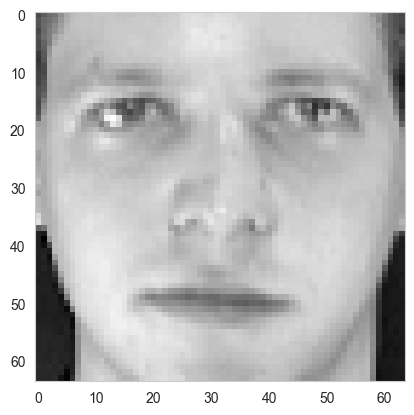

In [77]:
X2 = face.drop('target', axis=1)
y2 = face['target']

def show_image(X, idx):
    n_rows = int(np.sqrt(X.shape[1]))
    image = np.array(X)[idx - 1]
    pixels = image.reshape((n_rows, n_rows))
    plt.imshow(pixels, cmap='gray')
    plt.grid(False)
    plt.show()

show_image(X2, 1)


#### Image 200
Display the 200th image.

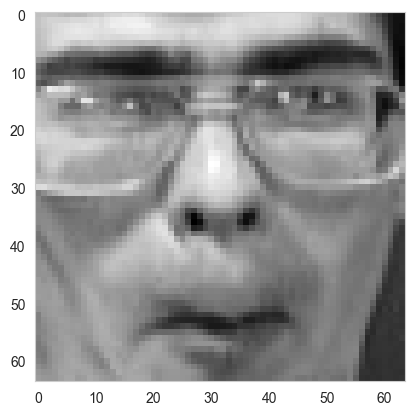

In [78]:
show_image(X2, 200)


#### First Person
Display all images of the first person.

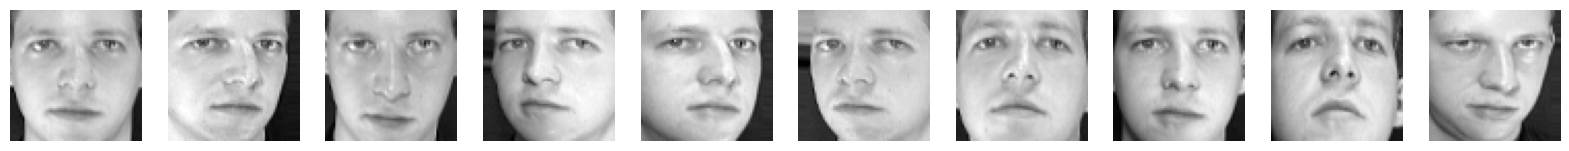

In [79]:
def show_person_images(data, person_index):
    n_rows = int(np.sqrt(X2.shape[1]))
    person_images = data[data['target'] == (person_index - 1)].drop('target', axis=1).values
    num_images = person_images.shape[0]
    fig, ax = plt.subplots(1, num_images, figsize=(num_images * 2, 2))
    for i in range(num_images):
        ax[i].imshow(person_images[i].reshape(n_rows, n_rows), cmap='gray')
        ax[i].axis('off')
    plt.show()

show_person_images(face, 1)


#### Tenth Person
Display all images of the tenth person.

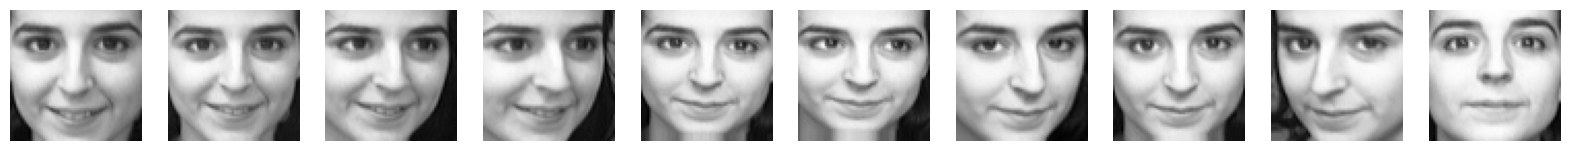

In [80]:
show_person_images(face, 10)


### Data Splitting

#### Original Data
Splitting the original data into training and testing sets in a 7:3 ratio.

In [81]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.3)


#### Principal Component Data
Perform principal component analysis on the data and utilize Scree Plot and Pareto Plot to illustrate the variance explained by each principal component.

##### Scree Plot

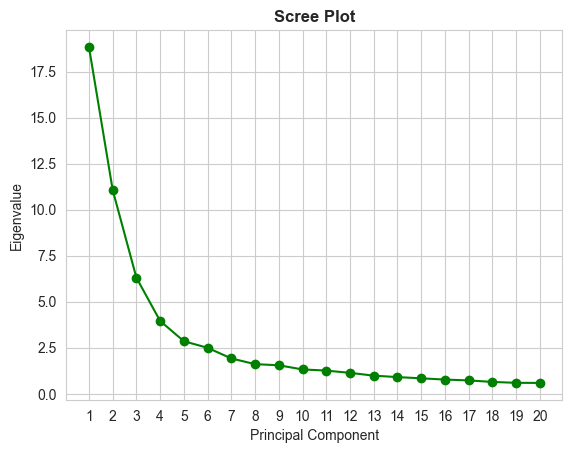

In [82]:
pca2 = PCA()
pca2_fit = pca2.fit_transform(X2)
eigvalues2 = pca2.explained_variance_

plt.plot(np.arange(1, 21), eigvalues2[:20], 'go-')
plt.title('Scree Plot', fontweight='bold')
plt.xlabel('Principal Component'), plt.ylabel('Eigenvalue')
plt.xticks(np.arange(1, 21))
plt.show()


According to the trend of eigenvalue changes in the scree plot, we can retain the top 10 principal components.

##### Pareto plot

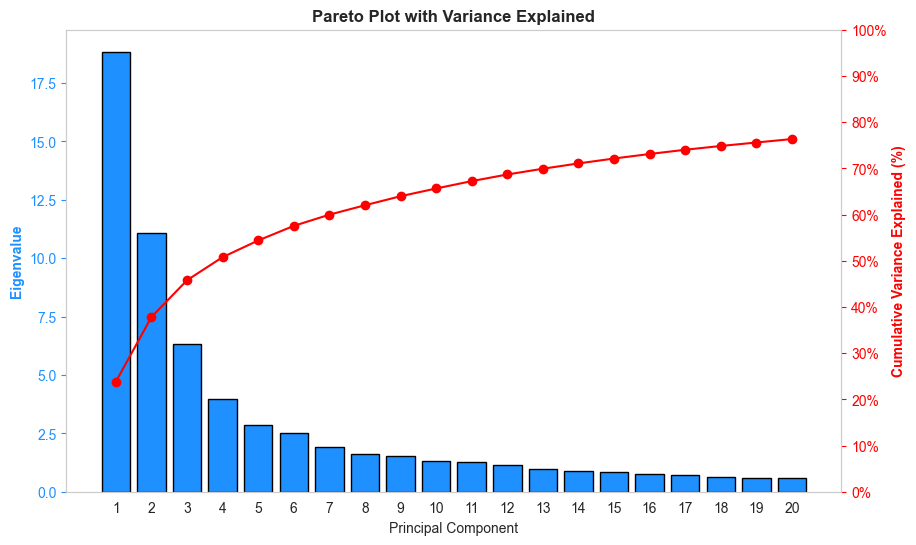

percentage of explained variance = 65.63%


In [83]:
variance_explained2 = eigvalues2 / sum(eigvalues2)

fig, ax1 = plt.subplots(figsize=(10, 6))
ax1.bar(np.arange(20) + 1, eigvalues2[:20], color='dodgerblue', edgecolor='black')
ax1.set_xlabel('Principal Component')
ax1.set_ylabel('Eigenvalue', color='dodgerblue', fontweight='bold')
ax1.tick_params('y', colors='dodgerblue')
ax1.grid(False)

ax2 = ax1.twinx()
ax2.plot(np.arange(20) + 1, np.cumsum(variance_explained2)[:20], 'ro-')
ax2.set_ylabel('Cumulative Variance Explained (%)', color='r', fontweight='bold')
ax2.tick_params('y', colors='r')
ax2.set_yticks(np.arange(0, 1.1, 0.1))
ax2.set_yticklabels(['{:,.0%}'.format(x) for x in np.arange(0, 1.1, 0.1)])
ax2.grid(False)

plt.title('Pareto Plot with Variance Explained', fontweight='bold')
plt.xticks(np.arange(1, 21))
plt.show()

explained_var2_ratio = sum(eigvalues2[0:10]) / sum(eigvalues2)
print("percentage of explained variance = {:.2%}".format(explained_var2_ratio))


#### Data Transformation
The top 10 principal components can explain 65.63% of the variance in the data. Therefore, we can use the top 10 principal components for dimensionality reduction.

In [84]:
pca2_3D = PCA(n_components=10)
X2_reduced = pca2_3D.fit_transform(X2)


Split the data transformed by principal component analysis into training and testing sets with a 7:3 ratio.

In [85]:
X2_reduced_train, X2_reduced_test, y2_reduced_train, y2_reduced_test = train_test_split(X2_reduced, y2, test_size=0.3, random_state=42)


### Multinomial Logistic Regression

#### Original Data

##### Model Training
Estimate the parameters of the multinomial logistic regression model using the training data from AT&T's face dataset.

In [86]:
param_grid2 = {'solver': ['newton-cg', 'sag', 'lbfgs'], 'multi_class': ["multinomial"]} 
grid_search2 = GridSearchCV(LogisticRegression(), param_grid2, cv=3, scoring='accuracy')
grid_search2.fit(X2_train, y2_train)

grid_search2.best_params_


{'multi_class': 'multinomial', 'solver': 'newton-cg'}

Utilize the Newton-CG method as the optimization approach.

In [87]:
import time
multlog2_reg = LogisticRegression(solver='newton-cg', multi_class="multinomial")
start_time = time.time()
multlog2_reg.fit(X2_train, y2_train)
end_time = time.time()
train_time_reduced = end_time - start_time
print(f'train time : {train_time_reduced:.2f} seconds')


train time : 10.32 seconds


The training time is approximately 10.32 seconds.

##### Model Evaluation

In [88]:
y2_train_pred = multlog2_reg.predict(X2_train)
print(f'training accuracy : {accuracy_score(y2_train, y2_train_pred):.2%}')


training accuracy : 100.00%


The training performance of the model is exceptionally perfect, with a training accuracy reaching 100%.

##### Cross-Validation (CV)
Perform K-fold cross-validation with K = 3 to validate the training accuracy of the model:

In [89]:
y2_scores = cross_val_score(multlog2_reg, X2_train, y2_train, cv=3, scoring='accuracy')
for i in range(len(y2_scores)):
    print("training accuracy of fold {}: {:.2%}".format(i + 1, y2_scores[i]))

print(f'Mean cross validation scores : {np.mean(y2_scores) * 100:.2f}%')


training accuracy of fold 1: 96.81%
training accuracy of fold 2: 86.02%
training accuracy of fold 3: 95.70%
Mean cross validation scores : 92.84%


According to the results of cross-validation, the training performance across the 3 folds is excellent, with accuracies of 96.81%, 86.02%, and 95.70% respectively.

##### Confusion Matrix

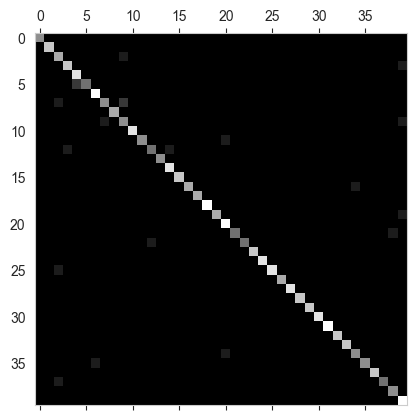

In [90]:
y2_train_pred_cv = cross_val_predict(multlog2_reg, X2_train, y2_train, cv=3)
conf_mx2 = confusion_matrix(y2_train, y2_train_pred_cv)
plt.matshow(conf_mx2, cmap='gray')
plt.grid(False)
plt.show()


From the confusion matrix plot, it can be observed that the model's classification performance during training is generally good, but there are suboptimal classifications for individuals 8, 12, 39, and 40.

##### F1 score

In [91]:
f1_score(y2_train, y2_train_pred_cv, average="macro")


0.9270601197478132

With an F1 score of 0.9271, the model demonstrates excellent classification performance on the training data. Based on the evaluation results mentioned above, it indicates that the model performs exceptionally well during training and does not require further adjustments.

##### Model Testing

In [92]:
y2_pred = multlog2_reg.predict(X2_test)
print(f'accuracy : {accuracy_score(y2_test, y2_pred):.2%}')


accuracy : 96.67%


The model exhibits excellent performance on the test data, achieving an accuracy of 96.67%.

#### Principal Component Data

##### Model Training
Using the principal components of AT&T's facial training data, estimate the parameters of a multivariate logistic regression model.

In [97]:
simplefilter("ignore", category=UserWarning)

grid_search2_reduced = GridSearchCV(LogisticRegression(), param_grid2, cv=3, scoring='accuracy')
grid_search2_reduced.fit(X2_reduced_train, y2_reduced_train)

grid_search2_reduced.best_params_


{'multi_class': 'multinomial', 'solver': 'newton-cg'}

Utilize the Newton-CG method as the optimization approach.

In [98]:
multlog2_reg_reduced = LogisticRegression(solver='newton-cg', multi_class="multinomial")
start_time_reduced = time.time()
multlog2_reg_reduced.fit(X2_reduced_train, y2_reduced_train)
end_time_reduced = time.time()
train_time_reduced = end_time_reduced - start_time_reduced

print(f'train time : {train_time_reduced:.2f} seconds')


train time : 0.06 seconds


The training time is approximately 0.06 seconds.

##### Model Evaluation

In [100]:
y2_reduced_train_pred = multlog2_reg_reduced.predict(X2_reduced_train)
print(f'training accuracy : {multlog2_reg_reduced.score(X2_reduced_train, y2_reduced_train_pred):.2%}')


training accuracy : 100.00%


The training performance of the model is exceptionally perfect, with a training accuracy reaching 100%.

##### Cross-Validation (CV)
Perform K-fold cross-validation with K = 3 to validate the training accuracy of the model:

In [101]:
y2_reduced_scores = cross_val_score(multlog2_reg_reduced, X2_reduced_train, y2_reduced_train, cv=3, scoring='accuracy')
for i in range(len(y2_reduced_scores)):
    print("training accuracy of fold {}: {:.2%}".format(i + 1, y2_reduced_scores[i]))
print(f'Mean cross validation scores : {np.mean(y2_reduced_scores) * 100:.2f}%')


training accuracy of fold 1: 77.66%
training accuracy of fold 2: 73.12%
training accuracy of fold 3: 79.57%
Mean cross validation scores : 76.78%


According to the cross-validation results, the training performance of the model in the 3 folds is mediocre, with accuracies of 77.66%, 73.12%, and 79.57%, respectively.

##### Confusion Matrix

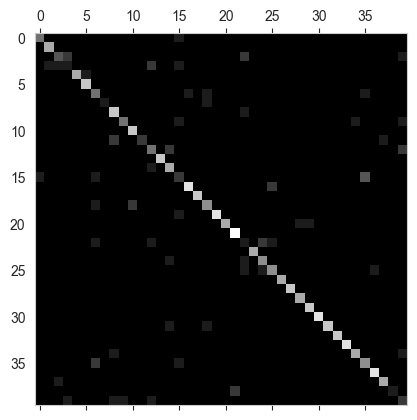

In [102]:
y2_reduced_train_pred_cv = cross_val_predict(multlog2_reg_reduced, X2_reduced_train, y2_reduced_train, cv=3)
conf_mx2_reduced = confusion_matrix(y2_reduced_train, y2_reduced_train_pred_cv)
plt.matshow(conf_mx2_reduced, cmap='gray')
plt.grid(False)
plt.show()


According to the confusion matrix, the model's classification performance during training is mediocre, with suboptimal classification for many categories.

##### F1 score

In [103]:
f1_score(y2_reduced_train, y2_reduced_train_pred_cv, average="macro")


0.7517307408793477

The F1 score is 0.7517, indicating that the model's classification performance on the training data is moderate.

##### Model Testing

In [104]:
y2_reduced_pred = multlog2_reg_reduced.predict(X2_reduced_test)
print(f'accuracy : {accuracy_score(y2_reduced_test, y2_reduced_pred):.2%}')


accuracy : 85.00%


The model's prediction on the test data is quite good, with an accuracy of 85%.

#### Comparison
| Data | Test Accuracy | F1 Score | Mean Cross Validation Scores | Train Time |
|--------|--------------|----------|------------------------------|------------|
| Original data | 96.67% | 75.17% | 92.84% | 10.32 seconds |
| PCA data | 85% | 75.17% | 76.78% | 0.07 seconds |

The performance of logistic regression using original data is better than that using principal component analysis (PCA) data. However, the execution time for PCA data is shorter than for original data. This may be attributed to the loss of some crucial features during principal component analysis, leading to a decrease in the predictive capability of the model.

### Support Vector Machine (SVM)

#### Original Data

##### Model Training
Estimate the parameters of the SVM model using the training data from AT&T's face dataset.

##### Randomized Search
Randomized Search is a hyperparameter optimization technique that, unlike grid search, does not rely on a fixed set of hyperparameter values. Instead, it randomly samples a certain number of hyperparameter combinations from the hyperparameter space for training and validation. It then selects the combination with the best performance. The advantage of randomized search is its relatively lower computational cost, enabling a faster discovery of optimal solutions. However, it may not guarantee finding the global optimum.

In [105]:
from sklearn.model_selection import RandomizedSearchCV

param_dist2 = [{'C': [0.1, 1, 10, 100, 1000], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 'kernel': ['rbf']},
  {'C': [0.1, 1, 10, 100, 1000], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 'kernel': ['poly'], 
   'degree': [1, 2, 3, 4, 5, 6], 'coef0': [0.001, 0.01, 0.1, 1, 10]}
]
random_search2 = RandomizedSearchCV(SVC(), param_dist2, cv=3, scoring='accuracy', n_iter=20, refit=True)
random_search2.fit(X2_train, y2_train)

random_search2.best_params_


{'kernel': 'rbf', 'gamma': 0.0001, 'C': 1000}

According to the results of the randomized search, the model uses a RBF kernel with $C = 1000$ and $\gamma = 0.0001$.

In [106]:
svm_clf2 = SVC(kernel='poly', gamma=0.1, degree=1, coef0=1, C=1)
start_time_svm = time.time()
svm_clf2.fit(X2_train, y2_train)
end_time_svm = time.time()
train_time_svm = end_time_svm - start_time_svm

print(f'train time : {train_time_svm:.2f} seconds')


train time : 0.29 seconds


The training time is approximately 0.29 seconds.

##### Model Evaluation

In [107]:
y2_train_pred_svm = svm_clf2.predict(X2_train)
print(f'training accuracy : {accuracy_score(y2_train, y2_train_pred_svm):.2%}')


training accuracy : 100.00%


The training performance of the model is exceptionally perfect, with a training accuracy reaching 100%.

##### Cross-Validation (CV)
Perform K-fold cross-validation with K = 3 to validate the training accuracy of the model:

In [108]:
y2_scores_svm = cross_val_score(svm_clf2, X2_train, y2_train, cv=3, scoring='accuracy')
for i in range(len(y2_scores)):
    print("training accuracy of fold {}: {:.2%}".format(i + 1, y2_scores_svm[i]))
print(f'Mean cross validation scores : {np.mean(y2_scores_svm) * 100:.2f}%')


training accuracy of fold 1: 93.62%
training accuracy of fold 2: 82.80%
training accuracy of fold 3: 95.70%
Mean cross validation scores : 90.70%


According to the results of cross-validation, the training performance across the 3 folds is excellent, with accuracies of 93.62%, 82.8%, and 90.70% respectively.

##### Confusion Matrix

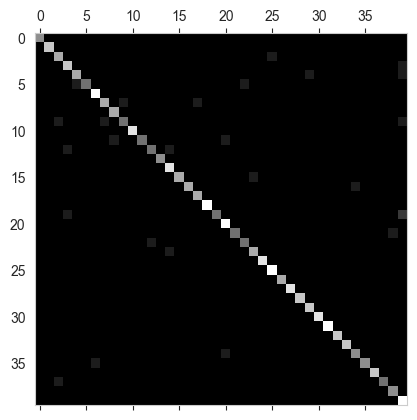

In [109]:
y2_train_pred_svm_cv = cross_val_predict(svm_clf2, X2_train, y2_train, cv=3)
conf_mx2_svm = confusion_matrix(y2_train, y2_train_pred_svm_cv)
plt.matshow(conf_mx2_svm, cmap='gray')
plt.grid(False)
plt.show()


From the confusion matrix plot, it is evident that the model's classification performance during training is good, but the classification of images for individuals 8 and 39 is suboptimal.

##### F1 score

In [110]:
f1_score(y2_train, y2_train_pred_svm_cv, average="macro")


0.903076319292499

With an F1 score of 0.9031, the model demonstrates excellent classification performance on the training data. Based on the evaluation results mentioned above, it indicates that the model performs exceptionally well during training and does not require further adjustments.

##### Model Testing

In [111]:
y2_pred_svm = svm_clf2.predict(X2_test)
print(f'accuracy : {accuracy_score(y2_test, y2_pred_svm):.2%}')


accuracy : 97.50%


The model exhibits excellent performance on the test data, achieving an accuracy of 97.5%.

#### Principal Component Data

##### Model Training
Using the principal components of AT&T's facial training data, estimate the parameters of a SVM model.

In [112]:
random_search2_reduced = RandomizedSearchCV(SVC(), param_dist2, cv=3, scoring='accuracy', n_iter=20, refit=True)
random_search2_reduced.fit(X2_reduced_train, y2_reduced_train)

random_search2_reduced.best_params_


{'kernel': 'poly', 'gamma': 0.0001, 'degree': 6, 'coef0': 10, 'C': 1}

According to the results of the random search, the model uses a polynomial kernel with $C = 1$, $c = 10$, $d = 6$, and $\gamma = 0.0001$.

In [113]:
svm_reduced_clf2 = SVC(kernel='poly', gamma=0.01, degree=1, coef0=0.001, C=1000)
start_time_reduced_svm = time.time()
svm_reduced_clf2.fit(X2_reduced_train, y2_reduced_train)
end_time_reduced_svm = time.time()
train_time_reduced_svm = end_time_reduced_svm - start_time_reduced_svm

print(f'train time : {train_time_reduced_svm:.2f} seconds')


train time : 0.01 seconds


The training time is approximately 0.01 seconds.

##### Model Evaluation

In [114]:
y2_reduced_train_pred_svm = svm_reduced_clf2.predict(X2_reduced_train)
print(f'training accuracy : {accuracy_score(y2_reduced_train, y2_reduced_train_pred_svm):.2%}')


training accuracy : 100.00%


The training performance of the model is exceptionally perfect, with a training accuracy reaching 100%.

##### Cross-Validation (CV)
Perform K-fold cross-validation with K = 3 to validate the training accuracy of the model:

In [115]:
y2_reduced_scores_svm = cross_val_score(svm_reduced_clf2, X2_reduced_train, y2_reduced_train, cv=3, scoring='accuracy')
for i in range(len(y2_reduced_scores_svm)):
    print("training accuracy of fold {}: {:.2%}".format(i + 1, y2_reduced_scores_svm[i]))

print(f'Mean cross validation scores : {np.mean(y2_reduced_scores_svm) * 100:.2f}%')


training accuracy of fold 1: 80.85%
training accuracy of fold 2: 81.72%
training accuracy of fold 3: 81.72%
Mean cross validation scores : 81.43%


According to the cross-validation results, the training performance of the model in the 3 folds is mediocre, with accuracies of 80.85%, 81.72%, and 81.72%, respectively.

##### Confusion Matrix

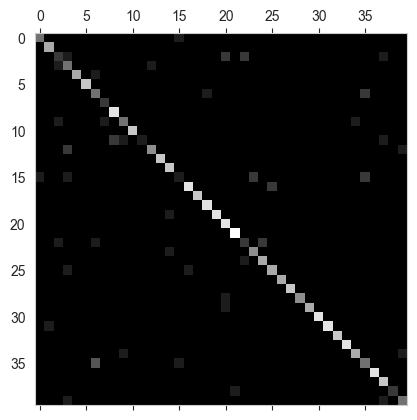

In [116]:
y2_reduced_train_pred_svm_cv = cross_val_predict(svm_reduced_clf2, X2_reduced_train, y2_reduced_train, cv=3)
conf_mx2_reduced_svm = confusion_matrix(y2_reduced_train, y2_reduced_train_pred_svm_cv)
plt.matshow(conf_mx2_reduced_svm, cmap='gray')
plt.grid(False)
plt.show()


According to the confusion matrix plot, the model's classification performance during training is generally good, but the classification of images for individuals 3, 8, 12, 16, 23, and 39 is suboptimal.

##### F1 score

In [117]:
f1_score(y2_reduced_train, y2_reduced_train_pred_svm_cv, average="macro")


0.7974743211295069

The F1 score is 0.7975, indicating that the model's classification performance on the training data is moderate.

##### Model Testing

In [118]:
y2_reduced_pred_svm = svm_reduced_clf2.predict(X2_reduced_test)
print(f'accuracy : {accuracy_score(y2_reduced_test, y2_reduced_pred_svm):.2%}')


accuracy : 85.83%


The model's prediction on the test data is quite good, with an accuracy of 85.83%.

#### Comparison
| Data | Test Accuracy | F1 Score | Mean Cross Validation Scores | Train Time |
|--------|--------------|----------|------------------------------|------------|
| Original data | 97.5% | 90.31% | 90.7% | 0.29 seconds |
| PCA data | 85.83% | 79.75% | 81.43% | 0.01 seconds |

From the table, it can be observed that the performance using the original data is superior to that of the principal component data. However, the execution time for the data after principal component analysis is shorter compared to using the original data.

### Neural Network

#### Original Data

##### Model Training
Estimate the parameters of the MLP model using the training data from AT&T's face dataset.

In [119]:
param_dist2_mlp = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 100)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'lbfgs', 'sgd'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate': ['constant', 'invscaling', 'adaptive'],
} 
random_search2_mlp = RandomizedSearchCV(MLPClassifier(), param_dist2_mlp, cv=3, scoring='accuracy', n_iter=20)
random_search2_mlp.fit(X2_train, y2_train)

random_search2_mlp.best_params_


{'solver': 'adam',
 'learning_rate': 'constant',
 'hidden_layer_sizes': (100, 100),
 'alpha': 0.001,
 'activation': 'tanh'}

According to the results of random search, the model uses the hyperbolic tangent (tanh) as the activation function for hidden layers, regularization coefficient is 0.001, there are 2 hidden layers with 100 neurons. Additionally, the adam optimizer is used to solve the model parameters, and the learning rate is a constant.

In [120]:
mlp_clf2 = MLPClassifier(solver='adam', learning_rate='constant', hidden_layer_sizes=(100, 100), alpha=0.001, activation='tanh')
start_time_mlp = time.time()
mlp_clf2.fit(X2_train, y2_train)
end_time_mlp = time.time()
train_time_mlp = end_time_mlp - start_time_mlp
print(f'train time : {train_time_mlp:.2f} seconds')


train time : 5.91 seconds


The training time is approximately 5.91 seconds.

##### Model Evaluation

In [121]:
y2_train_pred_mlp = mlp_clf2.predict(X2_train)
print(f'training accuracy : {accuracy_score(y2_train, y2_train_pred_mlp):.2%}')


training accuracy : 100.00%


The training performance of the model is exceptionally perfect, with a training accuracy reaching 100%.

##### Cross-Validation (CV)
Perform K-fold cross-validation with K = 3 to validate the training accuracy of the model:

In [122]:
y2_scores_mlp = cross_val_score(mlp_clf2, X2_train, y2_train, cv=3, scoring='accuracy')
for i in range(len(y2_scores_mlp)):
    print("training accuracy of fold {}: {:.2%}".format(i + 1, y2_scores_mlp[i]))

print(f'Mean cross validation scores : {np.mean(y2_scores_mlp) * 100:.2f}%')


training accuracy of fold 1: 87.23%
training accuracy of fold 2: 90.32%
training accuracy of fold 3: 84.95%
Mean cross validation scores : 87.50%


According to the results of cross-validation, the training performance across the 3 folds is great, with accuracies of 87.23%, 90.32%, and 84.95% respectively.

##### Confusion Matrix

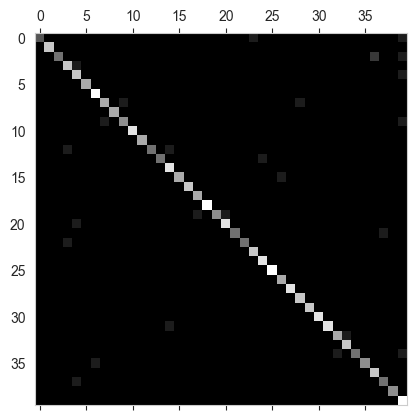

In [123]:
y2_train_pred_mlp_cv = cross_val_predict(mlp_clf2, X2_train, y2_train, cv=3)
conf_mx2_mlp = confusion_matrix(y2_train, y2_train_pred_mlp_cv)
plt.matshow(conf_mx2_mlp, cmap='gray')
plt.grid(False)
plt.show()


According to the confusion matrix, the model performed well in classifying images during training, but the classification of images for individuals 8 and 30 was suboptimal.

##### F1 score

In [124]:
f1_score(y2_train, y2_train_pred_mlp_cv, average="macro")


0.9037095764292392

With an F1 score of 0.9037, the model demonstrates great classification performance on the training data. 

##### Model Testing

In [125]:
y2_pred_mlp = mlp_clf2.predict(X2_test)
print(f'accuracy : {accuracy_score(y2_test, y2_pred_mlp):.2%}')


accuracy : 92.50%


The model's prediction on the test data is great, with an accuracy of 92.5%.

#### Principal Component Data

##### Model Training
Using the principal components of AT&T's facial training data, estimate the parameters of a MLP model.

In [126]:
random_search2_reduced_mlp = RandomizedSearchCV(MLPClassifier(), param_dist2_mlp, cv=3, scoring='accuracy')
random_search2_reduced_mlp.fit(X2_reduced_train, y2_reduced_train)

random_search2_reduced_mlp.best_params_


{'solver': 'lbfgs',
 'learning_rate': 'constant',
 'hidden_layer_sizes': (100, 100),
 'alpha': 0.0001,
 'activation': 'tanh'}

According to the results of random search, the model uses the tanh as the activation function for hidden layers, regularization coefficient is 0.0001, there are 2 hidden layers with both 100 neurons. Additionally, the LBFGS optimizer is used to solve the model parameters, and the learning rate is a constant.

In [127]:
mlp_reduced_clf2 = MLPClassifier(solver='lbfgs', learning_rate='constant', hidden_layer_sizes=(100, 100), alpha=0.0001, activation='tanh')
start_time_reduced_mlp = time.time()
mlp_reduced_clf2.fit(X2_reduced_train, y2_reduced_train)
end_time_reduced_mlp = time.time()
train_time_reduced_mlp = end_time_reduced_mlp - start_time_reduced_mlp
print(f'train time : {train_time_reduced_mlp:.2f} seconds')


train time : 0.55 seconds


The training time is approximately 0.55 seconds.

##### Model Evaluation

In [128]:
y2_reduced_train_pred_mlp = mlp_reduced_clf2.predict(X2_reduced_train)
print(f'training accuracy : {accuracy_score(y2_reduced_train, y2_reduced_train_pred_mlp):.2%}')


training accuracy : 100.00%


The training performance of the model is exceptionally perfect, with a training accuracy reaching 100%.

##### Cross-Validation (CV)
Perform K-fold cross-validation with K = 3 to validate the training accuracy of the model:

In [129]:
y2_reduced_scores_mlp = cross_val_score(mlp_reduced_clf2, X2_reduced_train, y2_reduced_train, cv=3, scoring='accuracy')
for i in range(len(y2_reduced_scores_mlp)):
    print("training accuracy of fold {}: {:.2%}".format(i + 1, y2_reduced_scores_mlp[i]))
    
print(f'Mean cross validation scores : {np.mean(y2_reduced_scores_mlp) * 100:.2f}%')


training accuracy of fold 1: 77.66%
training accuracy of fold 2: 79.57%
training accuracy of fold 3: 77.42%
Mean cross validation scores : 78.22%


According to the cross-validation results, the training performance of the model in the 3 folds is mediocre, with accuracies of 77.66%, 79.57%, and 77.42%, respectively.

##### Confusion Matrix

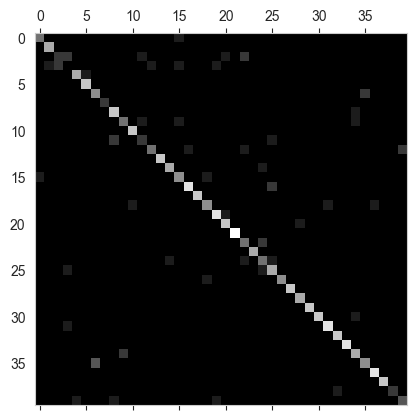

In [130]:
y2_reduced_train_pred_mlp_cv = cross_val_predict(mlp_reduced_clf2, X2_reduced_train, y2_reduced_train, cv=3)
conf_mx2_reduced_mlp = confusion_matrix(y2_reduced_train, y2_reduced_train_pred_mlp_cv)
plt.matshow(conf_mx2_reduced_mlp, cmap='gray')
plt.grid(False)
plt.show()


According to the confusion matrix, the model's classification performance during training is mediocre, and the classification of images for the 4th, 8th, 23rd, and 39th individuals is suboptimal.

##### F1 score

In [131]:
f1_score(y2_reduced_train, y2_reduced_train_pred_mlp_cv, average="macro")


0.7904106505809292

The F1 score is 0.7904, indicating that the model's classification performance on the training data is moderate.

##### Model Testing

In [132]:
y2_reduced_pred_mlp = mlp_reduced_clf2.predict(X2_reduced_test)
print(f'accuracy : {accuracy_score(y2_reduced_test, y2_reduced_pred_mlp):.2%}')


accuracy : 85.83%


The model's prediction on the test data is pretty good, with an accuracy of 85.83%.

#### Comparison
| Data | Test Accuracy | F1 Score | Mean Cross Validation Scores | Train Time |
|--------|--------------|----------|------------------------------|------------|
| Original data | 92.5% | 90.37% | 87.5% | 5.91 seconds |
| PCA data | 85.83% | 79.04% | 78.22% | 0.55 seconds |

From the table, it can be observed that the performance using the original data is superior to that of the principal component data. However, the execution time for the data after principal component analysis is shorter compared to using the original data.

### Model Comparison
| Model | Data | Test Accuracy | F1 Score | Mean Cross Validation Scores | Train Time |
|-------|------|---------------|----------|------------------------------|------------|
| Multinomial Logistic Regression | Original data | 96.67% | 75.17% | 92.84% | 10.32 seconds |
| Multinomial Logistic Regression | PCA data | 85% | 75.17% | 76.78% | 0.07 seconds |
| SVM | Original data | 97.5% | 90.31% | 90.7% | 0.29 seconds |
| SVM | PCA data | 85.83% | 79.75% | 81.43% | 0.01 seconds |
| MLP | Original Data | 92.5% | 90.37% | 87.5% | 5.91 seconds |
| MLP | PCA Data | 85.83% | 79.04% | 78.22% | 0.55 seconds |

Based on this table, we can draw the following conclusions:
1. The Multinomial Logistic Regression model performed well on the original data with a high test accuracy of 96.67% and a decent F1 score of 75.17%. However, when applied to PCA-transformed data, there was a significant drop in performance, with the test accuracy decreasing to 85%. This suggests that the reduced-dimensional representation from PCA may not be suitable for this type of logistic regression model.

2. Similar to Multinomial Logistic Regression, the SVM model achieved a high test accuracy of 97.5% on the original data. When applied to PCA data, there was a decrease in performance, but the drop was not as pronounced as with Multinomial Logistic Regression. The test accuracy decreased to 85.83%, and the F1 score dropped to 79.75%. This indicates that SVM is more robust to the dimensionality reduction introduced by PCA compared to Multinomial Logistic Regression.

3. The MLP model showed good performance on the original data with a test accuracy of 92.5% and an F1 score of 90.37%. However, similar to logistic regression, there was a significant drop in performance when applied to PCA-transformed data. The test accuracy decreased to 85.83%, and the F1 score dropped to 79.04%. The training time for the MLP model was relatively high, especially on the original data.

### Common Classification Errors
According to the confusion matrix, common classification errors occur for the 8th, 12th, 39th, and 40th individuals. Here are their photos:

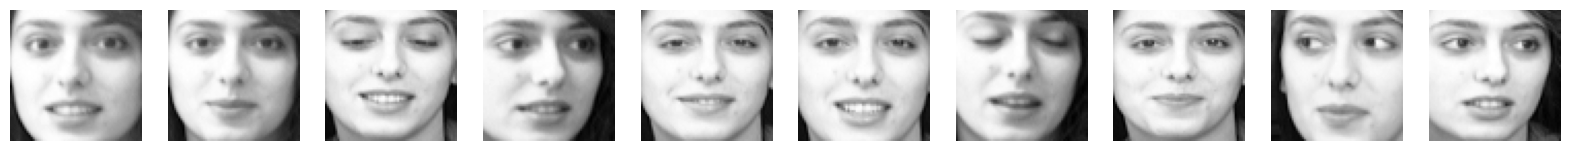

In [133]:
show_person_images(face, 8)


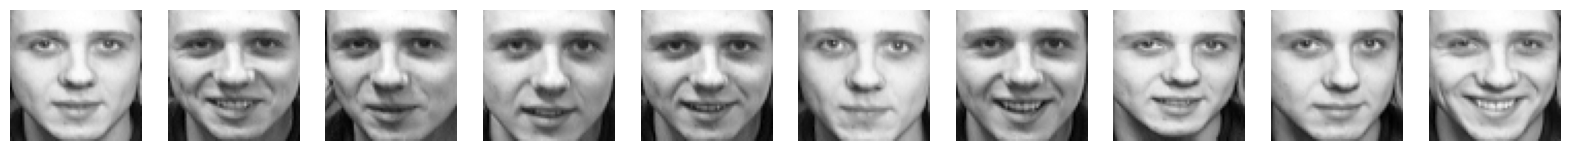

In [134]:
show_person_images(face, 12)


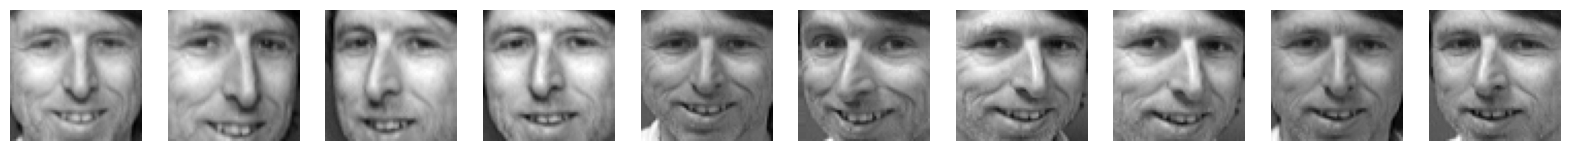

In [135]:
show_person_images(face, 39)


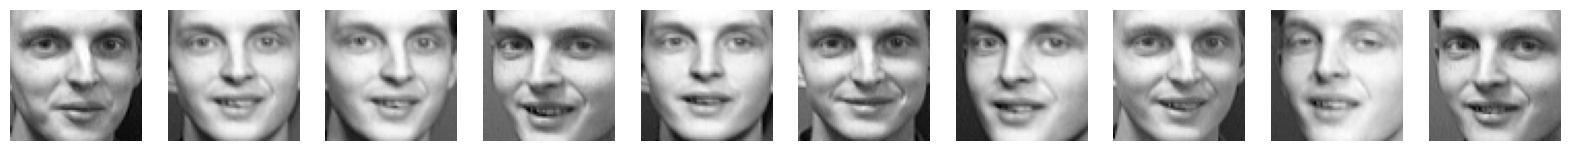

In [136]:
show_person_images(face, 40)


## Yale Faces Dataset
The Yale Faces dataset comprises frontal face images of 38 different individuals, totaling 2410 images, with approximately 64 images per person. The images have a resolution of 192×168 pixels and were captured under various lighting conditions and facial expressions. Each individual's images were taken under different lighting conditions, and there is significant variation in facial expressions, age, gender, and other factors.

In [137]:
from scipy.io import loadmat

DOWNLOAD_DATA3 = "allFaces.mat"
def load_mat_data(download_path = DOWNLOAD_PATH, download_data = DOWNLOAD_DATA3):
    data_path = os.path.join(download_path, download_data)
    data = loadmat(data_path)
    return(data)

allFaces = load_mat_data(DOWNLOAD_PATH, DOWNLOAD_DATA3)  
X3 = allFaces['faces'].T
X3.shape


(2410, 32256)

X consists of 2410 images (number of rows), each image having 192x168 pixels (number of columns).

In [138]:
nfaces = np.ndarray.flatten(allFaces['nfaces'])
len(nfaces)


38

There are a total of 38 individuals.

Assign a label to each image indicating which individual it belongs to. This is the target variable.

In [139]:
y3 = np.zeros(X3.shape[0])
start_idx = 0
for i in range(len(nfaces)):
    end_idx = start_idx + nfaces[i]
    y3[start_idx:end_idx] = i + 1 
    start_idx = end_idx


### Display Images

#### First Person
Display all images of the first person:

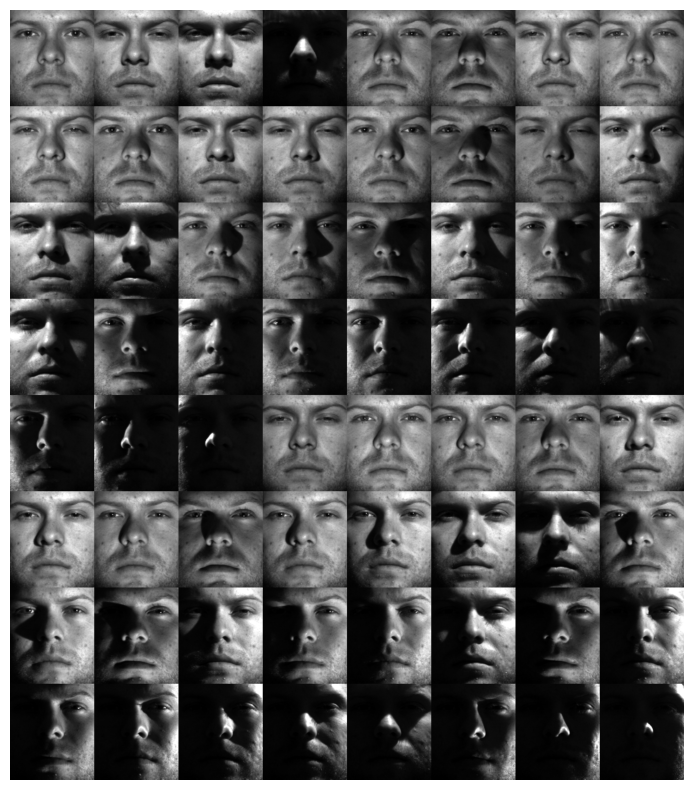

In [140]:
from warnings import simplefilter
simplefilter("ignore", category=DeprecationWarning)

def show_person_faces(person_idx, X, n, m):
    person_idx = person_idx - 1
    subset = X[:,sum(nfaces[:person_idx]):sum(nfaces[:(person_idx + 1)])]
    allFaces = np.zeros((n * 8, m * 8))
    count = 0

    for j in range(8):
        for k in range(8):
            if count < nfaces[person_idx]:
                allFaces[j * n:(j + 1) * n, k * m:(k + 1) * m] = np.reshape(subset[:,count], (m, n)).T
                count += 1
    
    fig, ax = plt.subplots(figsize = (10, 10))
    plt.imshow(allFaces, cmap = 'gray')
    plt.axis('off')
    plt.show()

m = int(allFaces['m'])
n = int(allFaces['n'])
show_person_faces(1, X3.T, n, m)


##### 15th Person
Display all images of the 15th person:

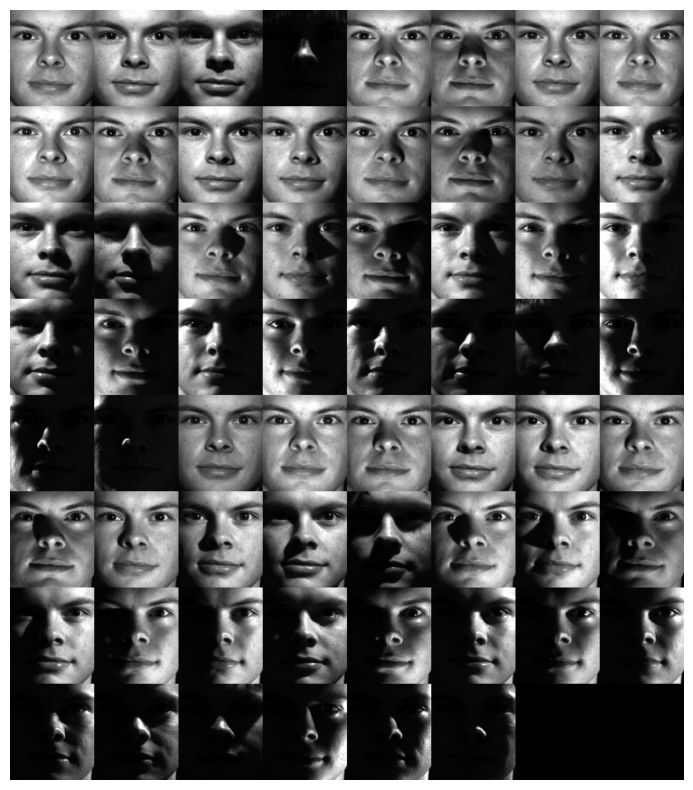

In [141]:
show_person_faces(15, X3.T, n, m)


### Data Splitting

#### Original Data
Due to the large amount of data, we will start by standardizing it to save computation time and then split it into training and testing sets with a ratio of 7:3.

In [142]:
scaler3 = StandardScaler()
X3_std = scaler3.fit_transform(X3)
X3_train, X3_test, y3_train, y3_test = train_test_split(X3_std, y3, test_size=0.3)


#### Principal Component Data
Perform principal component analysis on the data and retain the top 200 principal components for dimensionality reduction.

In [143]:
pca3_3D = PCA(n_components=200)
X3_reduced = pca3_3D.fit_transform(X3_std)


Split the data transformed by principal component analysis into training and testing sets with a 7:3 ratio.

In [144]:
X3_reduced_train, X3_reduced_test, y3_reduced_train, y3_reduced_test = train_test_split(X3_reduced, y3, test_size=0.3)


### Multinomial Logistic Regression

#### Original Data

##### Model Training
Estimate the parameters of a multinomial logistic regression model using the Yale Faces dataset. Utilize the Newton-CG algorithm as the optimization method.

In [146]:
multlog3_reg = LogisticRegression(solver='newton-cg', multi_class="multinomial")
start_time3 = time.time()
multlog3_reg.fit(X3_train, y3_train)
end_time3 = time.time()
train_time3_reduced = end_time3 - start_time3
print(f'train time : {train_time3_reduced:.2f} seconds')


train time : 1342.35 seconds


The training time is approximately 1342.35 seconds.

##### Model Evaluation

In [147]:
y3_train_pred = multlog3_reg.predict(X3_train)
print(f'accuracy : {accuracy_score(y3_train, y3_train_pred):.2%}')


accuracy : 100.00%


The training performance of the model is exceptionally perfect, with a training accuracy reaching 100%.

##### Confusion Matrix

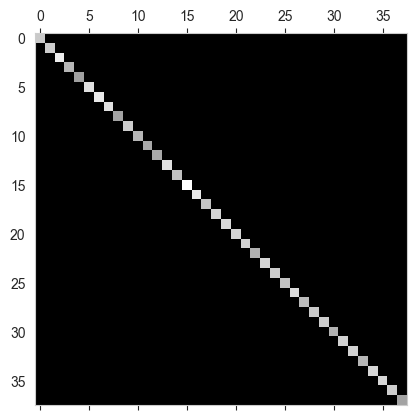

In [148]:
conf_mx3 = confusion_matrix(y3_train, y3_train_pred)
plt.matshow(conf_mx3, cmap='gray')
plt.grid(False)
plt.show()


The confusion matrix plot indicates that the model's classification performance during training is excellent.

##### F1 score

In [149]:
f1_score(y3_train, y3_train_pred, average="macro")


1.0

With an F1 score of 1, it indicates that the model achieves excellent classification performance on the training data. Based on the above evaluation results, it is evident that the model performs exceptionally well during training and does not require further adjustments.

##### Model Testing

In [150]:
y3_pred = multlog3_reg.predict(X3_test)
print(f'accuracy : {accuracy_score(y3_test, y3_pred):.2%}')


accuracy : 96.40%


The model exhibits excellent performance on the test data, achieving an accuracy of 96.4%.

#### Principal Component Data

##### Model Training
Estimate the parameters of the Multinomial Logistic Regression model using the principal component data of Yale Faces. The newton-cg algorithm is employed as the optimization method.

In [151]:
multlog3_reg_reduced = LogisticRegression(solver='newton-cg', multi_class="multinomial")
start_time3_reduced = time.time()
multlog3_reg_reduced.fit(X3_reduced_train, y3_reduced_train)
end_time3_reduced = time.time()
train_time3_reduced = end_time3_reduced - start_time3_reduced

print(f'train time : {train_time3_reduced:.2f} seconds')


train time : 18.67 seconds


The training time is approximately 18.67 seconds.

##### Model Evaluation

In [152]:
y3_reduced_train_pred = multlog3_reg_reduced.predict(X3_reduced_train)
print(f'training accuracy : {accuracy_score(y3_reduced_train, y3_reduced_train_pred):.2%}')


training accuracy : 100.00%


The training performance of the model is exceptionally perfect, with a training accuracy reaching 100%.

##### Confusion Matrix

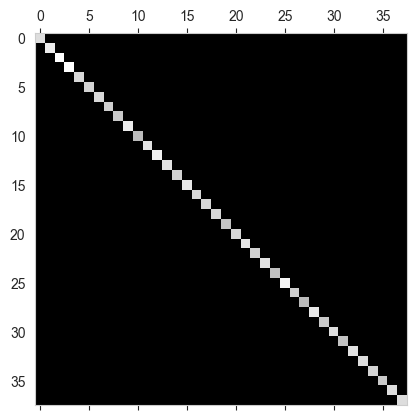

In [153]:
conf_mx3_reduced = confusion_matrix(y3_reduced_train, y3_reduced_train_pred)
plt.matshow(conf_mx3_reduced, cmap='gray')
plt.grid(False)


The confusion matrix plot indicates that the model's classification performance during training is excellent.

##### F1 score

In [154]:
f1_score(y3_reduced_train, y3_reduced_train_pred, average="macro")


1.0

With an F1 score of 1, it indicates that the model achieves excellent classification performance on the training data. Based on the above evaluation results, it is evident that the model performs exceptionally well during training and does not require further adjustments.

##### Model Testing

In [155]:
y3_reduced_pred = multlog3_reg_reduced.predict(X3_reduced_test)
print(f'accuracy : {accuracy_score(y3_reduced_test, y3_reduced_pred):.2%}')


accuracy : 96.40%


The model exhibits excellent performance on the test data, achieving an accuracy of 96.4%.

#### Comparison
| Data | Test Accuracy | F1 Score | Train Time |
|--------|--------------|----------|------------|
| Original data | 96.4% | 100% | 1342.35 seconds |
| PCA data | 96.4% | 100% | 18.67 seconds |

From the table, it can be observed that the performance using the principal component data is superior to that of the original data. 

### Support Vector Machine (SVM)

#### Original Data

##### Model Training
Estimate the parameters of the SVM model using the Yale Faces data. The RBF kernel is utilized, and hyperparameters are set to default values.

In [156]:
svm_clf3 = SVC()
start_time3_svm = time.time()
svm_clf3.fit(X3_train, y3_train)
end_time3_svm = time.time()
train_time3_svm = end_time3_svm - start_time3_svm

print(f'train time : {train_time3_svm:.2f} seconds')


train time : 63.14 seconds


The training time is approximately 63.14 seconds.

##### Model Evaluation

In [157]:
y3_train_pred_svm = svm_clf3.predict(X3_train)
print(f'training accuracy : {accuracy_score(y3_train, y3_train_pred_svm):.2%}')


training accuracy : 91.46%


The training performance of the model is great, with a training accuracy reaching 91.46%.

##### Confusion Matrix

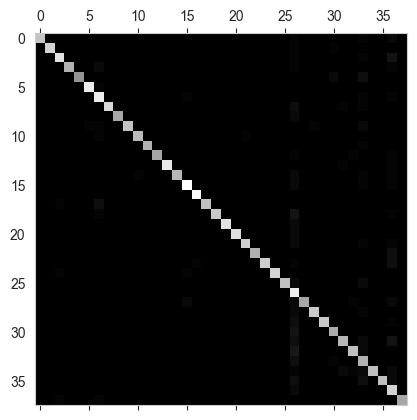

In [158]:
conf_mx3_svm = confusion_matrix(y3_train, y3_train_pred_svm)
plt.matshow(conf_mx3_svm, cmap='gray')
plt.grid(False)
plt.show()


The confusion matrix plot indicates that the model's classification performance during training is great.

##### F1 score

In [159]:
f1_score(y3_train, y3_train_pred_svm, average="macro")


0.9234696106595379

With an F1 score of 0.9235, it indicates that the model achieves great classification performance on the training data. 

##### Model Testing

In [160]:
y3_pred_svm = svm_clf3.predict(X3_test)
print(f'accuracy : {accuracy_score(y3_test, y3_pred_svm):.2%}')


accuracy : 81.19%


The model's prediction on the test data is moderate, with an accuracy of 81.19%.

#### Principal Component Data

##### Model Training
Estimate the parameters of the SVM model using the principal component data of Yale Faces. The RBF kernel is utilized.

In [161]:
svm_reduced_clf3 = SVC()
start_time3_reduced_svm = time.time()
svm_reduced_clf3.fit(X3_reduced_train, y3_reduced_train)
end_time3_reduced_svm = time.time()
train_time3_reduced_svm = end_time3_reduced_svm - start_time3_reduced_svm

print(f'train time : {train_time3_reduced_svm:.2f} seconds')


train time : 0.40 seconds


The training time is approximately 0.4 seconds.

##### Model Evaluation

In [162]:
y3_reduced_train_pred_svm = svm_reduced_clf3.predict(X3_reduced_train)
print(f'training accuracy : {accuracy_score(y3_reduced_train, y3_reduced_train_pred_svm):.2%}')


training accuracy : 88.56%


The training performance of the model is great, with a training accuracy reaching 88.56%.

##### Confusion Matrix

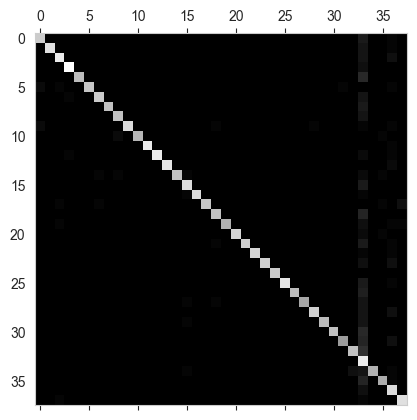

In [163]:
conf_mx3_reduced_svm = confusion_matrix(y3_reduced_train, y3_reduced_train_pred_svm)
plt.matshow(conf_mx3_reduced_svm, cmap='gray')
plt.grid(False)
plt.show()


The confusion matrix plot indicates that the model's classification performance during training is great.

##### F1 score

In [164]:
f1_score(y3_reduced_train, y3_reduced_train_pred_svm, average="macro")


0.9065709199747133

With an F1 score of 0.9066, it indicates that the model achieves great classification performance on the training data. 

##### Model Testing

In [165]:
y3_reduced_pred_svm = svm_reduced_clf3.predict(X3_reduced_test)
print(f'accuracy : {accuracy_score(y3_reduced_test, y3_reduced_pred_svm):.2%}')


accuracy : 82.02%


The model's prediction on the test data is pretty good, with an accuracy of 82.02%.

#### Comparison
| Data | Test Accuracy | F1 Score | Train Time |
|--------|--------------|----------|------------|
| Original data | 81.19% | 92.35% | 91.46 seconds |
| PCA data | 82.02% | 90.66% | 0.4 seconds |

The table suggests that when using PCA-transformed data, there is an improvement in test accuracy from 81.19% to 82.02%. Additionally, the F1 score increases from 92.35% to 90.66%. This indicates that PCA has managed to retain important information in a reduced-dimensional space, allowing the model to generalize better on the test set. Futhermore, the primary advantage of PCA comes from the drastic reduction in training time.

### Neural Network

#### Original Data

##### Model Training
Estimate the parameters of the MLP model using the Yale Faces data. The model's hidden layer utilizes the ReLU activation function, with a regularization term coefficient of 0.01. There is one hidden layer with 100 neurons. Additionally, the Adam optimizer is employed to solve the model parameters, with a learning rate that decreases over time.

In [166]:
mlp_clf3 = MLPClassifier(solver='adam', learning_rate='invscaling', hidden_layer_sizes=(100,), alpha=0.01, activation='relu')
start_time3_mlp = time.time()
mlp_clf3.fit(X3_train, y3_train)
end_time3_mlp = time.time()
train_time3_mlp = end_time3_mlp - start_time3_mlp
print(f'train time : {train_time3_mlp:.2f} seconds')


train time : 28.63 seconds


The training time is approximately 28.63 seconds.

##### Model Evaluation

In [167]:
y3_train_pred_mlp = mlp_clf3.predict(X3_train)
print(f'training accuracy : {accuracy_score(y3_train, y3_train_pred_mlp):.2%}')


training accuracy : 96.98%


The training performance of the model is exceptionally perfect, with a training accuracy reaching 96.98%.

##### Confusion Matrix

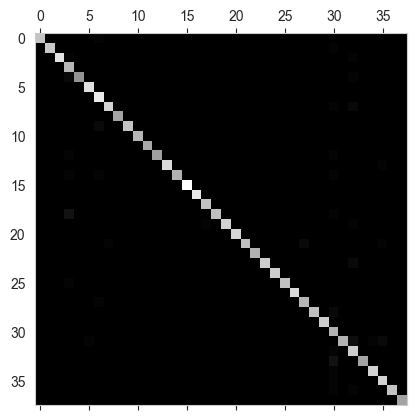

In [168]:
conf_mx3_mlp = confusion_matrix(y3_train, y3_train_pred_mlp)
plt.matshow(conf_mx3_mlp, cmap='gray')
plt.grid(False)
plt.show()


The confusion matrix plot indicates that the model's classification performance during training is excellent.

##### F1 score

In [169]:
f1_score(y3_train, y3_train_pred_mlp, average="macro")


0.9702275037922603

With an F1 score of 0.9702, it indicates that the model achieves excellent classification performance on the training data. Based on the above evaluation results, it is evident that the model performs exceptionally well during training and does not require further adjustments.

##### Model Testing

In [170]:
y3_pred_mlp = mlp_clf3.predict(X3_test)
print(f'accuracy : {accuracy_score(y3_test, y3_pred_mlp):.2%}')


accuracy : 85.75%


The model's prediction on the test data is pretty good, with an accuracy of 85.75%.

#### Principal Component Data

##### Model Training
Estimate the parameters of the MLP model using the principal component data of Yale Faces. The model's hidden layer uses the ReLU activation function, with a regularization term coefficient of 0.01. There is one hidden layer with 100 neurons. Additionally, the Adam optimizer is employed to solve the model parameters, with a learning rate that decreases over time.

In [171]:
mlp_reduced_clf3 = MLPClassifier(solver='adam', learning_rate='invscaling', hidden_layer_sizes=(100,), alpha=0.01, activation='relu')
start_time3_reduced_mlp = time.time()
mlp_reduced_clf3.fit(X3_reduced_train, y3_reduced_train)
end_time3_reduced_mlp = time.time()
train_time3_reduced_mlp = end_time3_reduced_mlp - start_time3_reduced_mlp
print(f'train time : {train_time3_reduced_mlp:.2f} seconds')


train time : 2.73 seconds


The training time is approximately 2.73 seconds.

##### Model Evaluation

In [172]:
y3_reduced_train_pred_mlp = mlp_reduced_clf3.predict(X3_reduced_train)
print(f'training accuracy : {accuracy_score(y3_reduced_train, y3_reduced_train_pred_mlp):.2%}')


training accuracy : 99.70%


The training performance of the model is exceptionally perfect, with a training accuracy reaching 99.7%.

##### Confusion Matrix

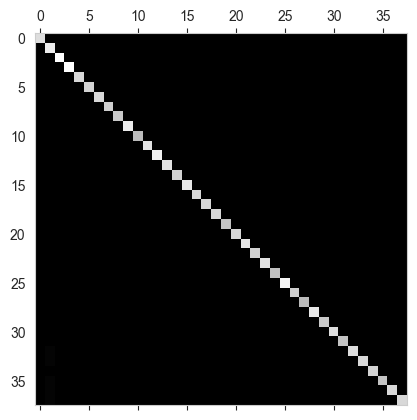

In [173]:
conf_mx3_reduced_mlp = confusion_matrix(y3_reduced_train, y3_reduced_train_pred_mlp)
plt.matshow(conf_mx3_reduced_mlp, cmap='gray')
plt.grid(False)
plt.show()


The confusion matrix plot indicates that the model's classification performance during training is excellent.

##### F1 score

In [174]:
f1_score(y3_reduced_train, y3_reduced_train_pred_mlp, average="macro")


0.9971961182719752

With an F1 score of 0.9972, it indicates that the model achieves excellent classification performance on the training data. Based on the above evaluation results, it is evident that the model performs exceptionally well during training and does not require further adjustments.

##### Model Testing

In [175]:
y3_reduced_pred_mlp = mlp_reduced_clf3.predict(X3_reduced_test)
print(f'accuracy : {accuracy_score(y3_reduced_test, y3_reduced_pred_mlp):.2%}')


accuracy : 90.87%


The model's prediction on the test data is great, with an accuracy of 90.87%.

#### Comparison
| Data | Test Accuracy | F1 Score | Train Time |
|--------|--------------|----------|------------|
| Original data | 85.75% | 97.02% | 28.63 seconds |
| PCA data | 90.87% | 99.72% | 2.73 seconds |

From the table, it can be observed that the performance using the principal component data is superior to that of the original data. 

### Model Comparison
| Model | Data | Test Accuracy | F1 Score | Train Time |
|-------|------|---------------|----------|------------|
| Multinomial Logistic Regression | Original data | 96.4% | 100% | 1342.35 seconds |
| Multinomial Logistic Regression | PCA data | 96.4% | 100% | 18.67 seconds |
| SVM | Original data | 81.19% | 92.35% | 91.46 seconds |
| SVM | PCA data | 82.02% | 90.66% | 0.4 seconds |
| MLP | Original data | 85.75% | 97.02% | 28.63 seconds |
| MLP | PCA data | 90.87% | 99.72% | 2.73 seconds |

Based on this table, we can draw the following conclusions:
1. The results suggest that both Multinomial Logistic Regression models performed well on the original and PCA data, with high test accuracies of 96.4%. Moreover, The F1 score remains at 100% for both cases. However, the most notable observation is the substantial reduction in training time when using PCA data, dropping from 1342.35 seconds to 18.67 seconds.

2. The SVM model shows a modest improvement in test accuracy from 81.19% to 82.02% when using PCA-transformed data. The F1 score also experiences a slight decrease from 92.35% to 90.66%. Notably, the training time decreases significantly from 91.46 seconds to just 0.4 seconds. This emphasizes the efficiency gains achieved by using PCA with SVM.

3. For the MLP model, there is a considerable improvement in both test accuracy and F1 score when using PCA data. The test accuracy increases from 85.75% to 90.87%, and the F1 score improves from 97.02% to 99.72%. The most significant advantage, however, is the substantial reduction in training time from 28.63 seconds to 2.73 seconds. This showcases the potential benefits of employing PCA with complex models like MLP.

4. Across all three models, there is a consistent trend of PCA leading to a drastic reduction in training time without sacrificing performance. This highlights the efficiency of PCA as a preprocessing step, particularly in scenarios where training time is a critical consideration.